## DS 7331 Data Mining
## Lab 2
## 3/10/2019
## Mallory Hightower, Richard Farrow, and Brandon de la Houssaye

## Data Preparation Part 1

#### Import and View Data

In [6]:
#import necessary packages
import pandas as pd
import numpy as np
from __future__ import print_function
import matplotlib.pyplot as plt
import seaborn as sns

#import and view the data
df_no_edit = pd.read_csv("C:/Users/Mallory/Documents/SMU/Data Mining/LAB data/athlete_events.csv")
df_no_edit.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
# describe the unedited data set
df_no_edit.describe

<bound method NDFrame.describe of             ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5            Christine Jacoba Aaftink   F  21.0   185.0    82.0   
5            5            Christine Jacoba Aaftink   F  21.0   185.0    82.0   
6            5            Christine Jacoba Aaftink   F  25.0   185.0    82.0   
7            5            Christine Jacoba Aaftink   F  25.0   185.0    82.0   
8            5            Christine Jacoba Aaftink   F  27.0   185.0    82.0   
9            5            Christine Jacoba Aaftink   F  27.0   185.0    82.0   
10           6                     Per Knut Aaland   M  31.0   188.0    75.0   
11    

### Define Variables

The data set orignially contains 15 variables and 271,116 rows of observations.  A single observation represents a particular athlete in a given sport, event, and Olympic games.  The variables are as follows:

-	ID: (Int) This is a unique identifier given to a particular athlete.  Athletes may participate in multiple, games, sports, and events, so there are repeats of the ID through the data set.
-	Name: (Categorical) This is the unique name given to a particular athlete.  As each ID is assigned to each unique name, the names also repeat throughout the data set.
-	Sex: (One-Hot) An athlete is listed as either male (“M”) or female (“F”).  This is a binary category; all athletes are assigned into one of these categories.  The Olympic games establish competition within these categories (i.e., males compete against other males)
-	Age: (Int) This is the age of the athlete at that particular point in time of the observation (i.e., the age of an athlete will change from one Olympic even to the next).  Age is measured in years.
-	Height: (Int) This is the given height in centimeters for an athlete.  This is a continuous variable.
-	Weight: (Int) This is the given weight in kilograms for an athlete.  This is a continuous variable.
-	Team: (Categorical) This is the athlete’s team and teams are formed according to representing country (e.g., USA, Canada, etc.)
-	NOC: (Categorical) This is the abbreviation of a country (i.e., China = “CHN”)
-	Games: (Categorical) This is in reference to the Olympic event.  Olympic events are typically denoted by year of the even and whether it is summary or winter.  
-	Year: (Int) This is in reference to the Games year of occurrence 
-	Season: (Categorical) This is in reference to whether the Games was ‘Summer’ or ‘Winter’.
-	City: (Categorical) This variable details the city where the Olympic event was held.  Olympic events have historically been awarded or held within a particular host city.  
-	Sport: (Categorical) This variable provides the sport of competition (i.e., downhill skiing)
-	Event: (Categorical) Within a given sport there may be multiple events (such as distances or, for swimming, stroke)
-	Medal:  (Cateogrical) This variable indicates what medal was won.  The choices for this categorical variable include ‘Gold’, ‘Silver’, ‘Bronze’, and ‘NA’.  The last class, ‘NA’, indicates that no medal was won.

The variables considered include both continuous and categorical variables.

#### Edit the Data 

In [8]:
# make all the edits to the data before using it

#drop the ID, Team, Name, Games, City and Event columns
# Games  is being dropped becuase year and season already contain that value
# Event is esentially a more specific sport, which we most likely will not need and will reduce later one-hot encoding
# City is also a little more granular and dropping it reduced later one-hot ecoding and processing speeds
df1 = df_no_edit.drop(['ID'], axis=1)
df1 = df1.drop(['Team'], axis=1)
df1 = df1.drop(['Event'], axis=1)
df1 = df1.drop(['Name'], axis=1)
df1 = df1.drop(['Games'], axis=1)
df1 = df1.drop(['City'], axis=1)

#impute Age, Height, Weight, and Medal
#replace NaN with mean of column
df1['Weight']=df1['Weight'].fillna(df1['Weight'].mean())
df1['Height']=df1['Height'].fillna(df1['Height'].mean())
df1['Age']=df1['Age'].fillna(df1['Age'].mean())

#replace the NaN in medal to "None"
df1["Medal"].fillna("None", inplace = True)

#replace the different medal categories to "Medal" to make it a binary classification
df1['Medal']= df1['Medal'].replace('Gold', 'Medal')
df1['Medal']= df1['Medal'].replace('Silver', 'Medal')
df1['Medal']= df1['Medal'].replace('Bronze', 'Medal')

df1 ['IsMedal'] =df1.Medal == 'Medal'
df1.IsMedal = df1.IsMedal.astype(np.int)
df1 = df1.drop(['Medal'], axis=1)


# replace the current Sex atribute with IsMale to avoid one hot encoding
#delete Sex attribute afterwards
df1['IsMale'] = df1.Sex=='M'
df1.IsMale = df1.IsMale.astype(np.int)
df1 = df1.drop(['Sex'], axis=1)

# replace current Season attribute with IsSummer to avoid one hot encoding
df1['IsSummer'] = df1.Season=='Summer'
df1.IsSummer = df1.IsSummer.astype(np.int)
df1 = df1.drop(['Season'], axis=1)

df=pd.get_dummies(df1, columns=['NOC', 'Sport'])

if 'NOC' in df:   
    del df['NOC']    
if 'Sport' in df:
    del df['Sport'] 

df.head()

,Age,Height,Weight,Year,IsMedal,IsMale,IsSummer,NOC_AFG,NOC_AHO,NOC_ALB,...,Sport_Table Tennis,Sport_Taekwondo,Sport_Tennis,Sport_Trampolining,Sport_Triathlon,Sport_Tug-Of-War,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling
0,24.0,180.00000,80.000000,1992,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,23.0,170.00000,60.000000,2012,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24.0,175.33897,70.702393,1920,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.0,175.33897,70.702393,1900,1,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,21.0,185.00000,82.000000,1988,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Cross Validation

In [76]:
## we can describe this later, but setting it up now.
## set the seed 


## Choose the method you will use for dividing your data into training and testing splits (i.e., are you using Stratiﬁed 10-fold cross validation? Why?). 
## Explain why your chosen method is appropriate or use more than one method as appropriate. 
## For example, if you are using time series data then you should be using continuous training and testing sets across time.

from sklearn.model_selection import StratifiedShuffleSplit

# Set up CV object    
num_cv_iterations = 10
cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations, test_size=0.2, random_state=0)
print(cv_object)

StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None)


#### Use Recursive Feature Elimination to Reduce Number of Features

##### RFE Using Random Forest

##### Data Set with IsMedal as Target Variable

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score

# create X1 and y1 from the data
if 'IsMedal' in df:
    y1 = df['IsMedal'].values # get the labels we want  
    X1 = df.loc[:, df.columns != 'IsMedal'].values # use everything else to predict!

RFC=RandomForestClassifier(n_estimators=50, criterion="gini", max_depth=5, random_state=0, class_weight="balanced")
scaler = StandardScaler()

for train_indices, test_indices in cv_object.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we are going to scale the data because we are using RF as as form of RFE, and 
      # we are deleting variables based off their variable importance coefficients, so because
      # we are interpreting the features on the same scale in order to keep/remove them from the model,
      # we will go ahead and scale them.
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    X1_test = scaler.transform(X1_test)
    
    # train the reusable model on the training data
    RFC.fit(X1_train,y1_train) # train object
    y1_hat = RFC.predict(X1_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y1_test,y1_hat)
    conf = mt.confusion_matrix(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)

F1 Score
 0.3727096442281056
accuracy 0.7076755680141634
confusion matrix
 [[33664 12603]
 [ 3248  4709]]
F1 Score
 0.3651448987693529
accuracy 0.7050752434346415
confusion matrix
 [[33633 12634]
 [ 3358  4599]]
F1 Score
 0.3782345828295042
accuracy 0.7155134257893184
confusion matrix
 [[34106 12161]
 [ 3265  4692]]
F1 Score
 0.3705119871525255
accuracy 0.6963890528179404
confusion matrix
 [[32916 13351]
 [ 3112  4845]]
F1 Score
 0.3727928279087897
accuracy 0.7032494836234877
confusion matrix
 [[33351 12916]
 [ 3175  4782]]
F1 Score
 0.3613971016745018
accuracy 0.696868545293597
confusion matrix
 [[33136 13131]
 [ 3306  4651]]
F1 Score
 0.37365539202361076
accuracy 0.7025486869282974
confusion matrix
 [[33284 12983]
 [ 3146  4811]]
F1 Score
 0.3658527146782245
accuracy 0.697790646208321
confusion matrix
 [[33110 13157]
 [ 3230  4727]]
F1 Score
 0.36061955622118
accuracy 0.7008151372086161
confusion matrix
 [[33426 12841]
 [ 3382  4575]]
F1 Score
 0.3657770176206197
accuracy 0.705942018

In [78]:
# Get numerical feature importances for IsMedal target
df_working=df.drop('IsMedal', axis = 1)
feature_list = list(df_working.columns)
importances = list(RFC.feature_importances_)
# List of variables and importances
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Year                 Importance: 0.13
Variable: NOC_USA              Importance: 0.11
Variable: NOC_URS              Importance: 0.09
Variable: Sport_Rowing         Importance: 0.08
Variable: Height               Importance: 0.06
Variable: Weight               Importance: 0.05
Variable: Sport_Alpine Skiing  Importance: 0.05
Variable: Sport_Athletics      Importance: 0.05
Variable: NOC_GDR              Importance: 0.04
Variable: Sport_Gymnastics     Importance: 0.04
Variable: Age                  Importance: 0.03
Variable: Sport_Hockey         Importance: 0.02
Variable: Sport_Ice Hockey     Importance: 0.02
Variable: IsSummer             Importance: 0.01
Variable: NOC_EGY              Importance: 0.01
Variable: NOC_GER              Importance: 0.01
Variable: NOC_LUX              Importance: 0.01
Variable: NOC_MEX              Importance: 0.01
Variable: NOC_POR              Importance: 0.01
Variable: Sport_Art Competitions Importance: 0.01
Variable: Sport_Cross Country Skiing I

In [79]:
# convert the feature_importances to a df for editing
df_feature_imp = pd.DataFrame(feature_importances, columns=['Feature','Importance'])
# remove the features with an importance of 0!
df_feature_imp_2 = df_feature_imp[df_feature_imp.Importance != 0]
df_feature_imp_2.head()
# convert it back to a list for plotting
list_feature_importances=df_feature_imp_2['Importance'].values.T.tolist()
list_feature_features=df_feature_imp_2['Feature'].values.T.tolist()

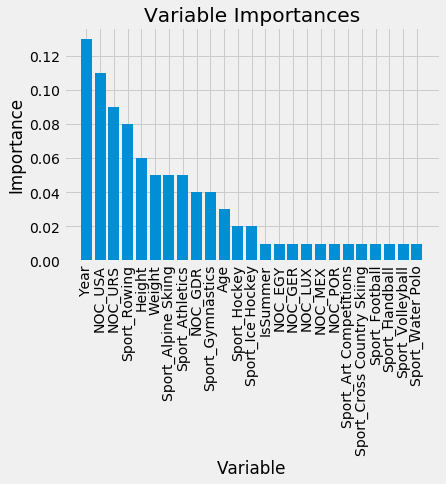

In [80]:
# plot the feature importances
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(list_feature_importances)))
# Make a bar chart
plt.bar(x_values, list_feature_importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, list_feature_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

NOTE: we originally did our RFE with a little better RF model with many more decision trees but it takes SO LONG to run (days) with ten fold CV that we are just running the code with a different model so you can see the output here. The parameter results from  this code may be a little different but we are sticking with the ones that were calculated after running the better random forest model.

In [81]:
list_feature_features

['Year',
 'NOC_USA',
 'NOC_URS',
 'Sport_Rowing',
 'Height',
 'Weight',
 'Sport_Alpine Skiing',
 'Sport_Athletics',
 'NOC_GDR',
 'Sport_Gymnastics',
 'Age',
 'Sport_Hockey',
 'Sport_Ice Hockey',
 'IsSummer',
 'NOC_EGY',
 'NOC_GER',
 'NOC_LUX',
 'NOC_MEX',
 'NOC_POR',
 'Sport_Art Competitions',
 'Sport_Cross Country Skiing',
 'Sport_Football',
 'Sport_Handball',
 'Sport_Volleyball',
 'Sport_Water Polo']

In [11]:
# create new data set for the target variable IsMedal

# eliminate insignificant variables from the data set
# don't forget to add IsMedal (the target)
cols = [col for col in df.columns if col in['IsMedal', 'NOC_USA','NOC_URS','Year','Sport_Gymnastics','Height','Weight',
                                            'Sport_Rowing','Sport_Alpine Skiing','Sport_Athletics','Age','NOC_GDR',
                                            'Sport_Art Competitions','Sport_Handball','Sport_Hockey','Sport_Ice Hockey',
                                            'IsSummer','NOC_EGY','NOC_GER','NOC_MEX','NOC_POR','NOC_RUS',
                                            'Sport_Cross Country Skiing','Sport_Football','Sport_Rugby','Sport_Volleyball',
                                            'Sport_Water Polo']]
df_medal = df[cols] 

# view the final data set for the IsMedal target variable
df_medal.head()

,Age,Height,Weight,Year,IsMedal,IsSummer,NOC_EGY,NOC_GDR,NOC_GER,NOC_MEX,...,Sport_Cross Country Skiing,Sport_Football,Sport_Gymnastics,Sport_Handball,Sport_Hockey,Sport_Ice Hockey,Sport_Rowing,Sport_Rugby,Sport_Volleyball,Sport_Water Polo
0,24.0,180.00000,80.000000,1992,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,23.0,170.00000,60.000000,2012,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24.0,175.33897,70.702393,1920,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,34.0,175.33897,70.702393,1900,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21.0,185.00000,82.000000,1988,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Data Set with IsMale as Target Variable

In [93]:
# do the same RFE process, but with IsMale as the target variable

# Set up the y2 and X2 for IsMale
if 'IsMale' in df:
    y2 = df['IsMale'].values # get the labels we want  
    X2 = df.loc[:, df.columns != 'IsMale'].values # use everything else to predict!

# start the RFE with CV
RFC=RandomForestClassifier(n_estimators=50, criterion="gini", max_depth=5, random_state=0, class_weight="balanced")
scaler = StandardScaler()

for train_indices, test_indices in cv_object.split(X2,y2): 

    X2_train = X2[train_indices]
    y2_train = y2[train_indices]
    
    X2_test = X2[test_indices]
    y2_test = y2[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we are going to scale the data because we are using RF as as form of RFE, and 
      # we are deleting variables based off their variable importance coefficients, so because
      # we are interpreting the features on the same scale in order to keep/remove them from the model,
      # we will go ahead and scale them.
    scaler.fit(X2_train)
    X2_train = scaler.transform(X2_train)
    X2_test = scaler.transform(X2_test)
    
    # train the reusable model on the training data
    RFC.fit(X2_train,y2_train) # train object
    y2_hat = RFC.predict(X2_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y2_test,y2_hat)
    conf = mt.confusion_matrix(y2_test,y2_hat)
    f1 = f1_score(y2_test, y2_hat, pos_label=0, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)

F1 Score
 0.6886817735163624
accuracy 0.8071886987311891
confusion matrix
 [[11564  3341]
 [ 7114 32205]]
F1 Score
 0.6918483129292325
accuracy 0.8096783712009442
confusion matrix
 [[11585  3320]
 [ 7000 32319]]
F1 Score
 0.6894002129421507
accuracy 0.8063219238713485
confusion matrix
 [[11655  3250]
 [ 7252 32067]]
F1 Score
 0.6928183829993634
accuracy 0.8131270286220124
confusion matrix
 [[11427  3478]
 [ 6655 32664]]
F1 Score
 0.6826517894237047
accuracy 0.8027810563588079
confusion matrix
 [[11502  3403]
 [ 7291 32028]]
F1 Score
 0.6883330397510422
accuracy 0.8042195337857775
confusion matrix
 [[11723  3182]
 [ 7434 31885]]
F1 Score
 0.6854800095762509
accuracy 0.8061743877249926
confusion matrix
 [[11453  3452]
 [ 7058 32261]]
F1 Score
 0.690072787326442
accuracy 0.8131085866037179
confusion matrix
 [[11282  3623]
 [ 6511 32808]]
F1 Score
 0.6898868458274398
accuracy 0.8059161994688698
confusion matrix
 [[11706  3199]
 [ 7325 31994]]
F1 Score
 0.6903432002150601
accuracy 0.8088115

In [94]:
# Get numerical feature importances for IsMale target
df_working=df.drop('IsMale', axis = 1)
feature_list = list(df_working.columns)
importances = list(RFC.feature_importances_)
# List of variables and importances
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Weight               Importance: 0.21
Variable: Height               Importance: 0.18
Variable: Year                 Importance: 0.18
Variable: Age                  Importance: 0.1
Variable: Sport_Boxing         Importance: 0.05
Variable: Sport_Swimming       Importance: 0.04
Variable: Sport_Wrestling      Importance: 0.04
Variable: NOC_CHN              Importance: 0.02
Variable: Sport_Bobsleigh      Importance: 0.02
Variable: Sport_Ski Jumping    Importance: 0.02
Variable: Sport_Synchronized Swimming Importance: 0.02
Variable: NOC_CAN              Importance: 0.01
Variable: Sport_Football       Importance: 0.01
Variable: Sport_Gymnastics     Importance: 0.01
Variable: Sport_Ice Hockey     Importance: 0.01
Variable: Sport_Nordic Combined Importance: 0.01
Variable: Sport_Shooting       Importance: 0.01
Variable: Sport_Softball       Importance: 0.01
Variable: Sport_Volleyball     Importance: 0.01
Variable: IsMedal              Importance: 0.0
Variable: IsSummer             Imp

In [95]:
# convert the feature_importances to a df for editing
df_feature_imp = pd.DataFrame(feature_importances, columns=['Feature','Importance'])
# remove the features with an importance of 0!
df_feature_imp_2 = df_feature_imp[df_feature_imp.Importance != 0]
df_feature_imp_2.head()
# convert it back to a list for plotting
list_feature_importances=df_feature_imp_2['Importance'].values.T.tolist()
list_feature_features=df_feature_imp_2['Feature'].values.T.tolist()

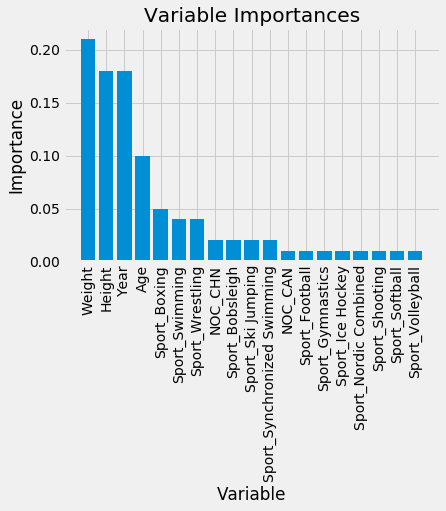

In [96]:
# plot the feature importances
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(list_feature_importances)))
# Make a bar chart
plt.bar(x_values, list_feature_importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, list_feature_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

NOTE: we originally did our RFE with a little better RF model with many more decision trees but it takes SO LONG to run (days) with ten fold CV that we are just running the code with a different model so you can see the output here. The parameter results from  this code may be a little different but we are sticking with the ones that were calculated after running the better random forest model.

In [97]:
list_feature_features

['Weight',
 'Height',
 'Year',
 'Age',
 'Sport_Boxing',
 'Sport_Swimming',
 'Sport_Wrestling',
 'NOC_CHN',
 'Sport_Bobsleigh',
 'Sport_Ski Jumping',
 'Sport_Synchronized Swimming',
 'NOC_CAN',
 'Sport_Football',
 'Sport_Gymnastics',
 'Sport_Ice Hockey',
 'Sport_Nordic Combined',
 'Sport_Shooting',
 'Sport_Softball',
 'Sport_Volleyball']

In [12]:
# create new data set for the target variable IsMale

# eliminate insignificant variables from the data set
# don't forget to add IsMale (the target)
cols = [col for col in df.columns if col in['IsMale','Weight', 'Height','Year','Age','Sport_Boxing','Sport_Swimming',
                                            'Sport_Wrestling','NOC_CHN','Sport_Cycling','Sport_Ski Jumping',
                                            'Sport_Art Competitions','Sport_Bobsleigh','Sport_Football','Sport_Gymnastics',
                                            'Sport_Nordic Combined','Sport_Rhythmic Gymnastics','Sport_Sailing','Sport_Shooting',
                                            'Sport_Softball','Sport_Synchronized Swimming']]
df_male = df[cols]  

# view the final data set for the IsMale target variable
df_male.head()

,Age,Height,Weight,Year,IsMale,NOC_CHN,Sport_Art Competitions,Sport_Bobsleigh,Sport_Boxing,Sport_Cycling,...,Sport_Gymnastics,Sport_Nordic Combined,Sport_Rhythmic Gymnastics,Sport_Sailing,Sport_Shooting,Sport_Ski Jumping,Sport_Softball,Sport_Swimming,Sport_Synchronized Swimming,Sport_Wrestling
0,24.0,180.00000,80.000000,1992,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,23.0,170.00000,60.000000,2012,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24.0,175.33897,70.702393,1920,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.0,175.33897,70.702393,1900,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21.0,185.00000,82.000000,1988,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Preparation Part 2

### Define Final Variables and Describe Final Data Set

The oringinal dataset was significantly reduced to arrive at the two final data sets. There is one data set used for the target variable IsMedal (df_medal) and one data set used for the target variable IsMale (df_male). There are two data sets because we used RFE with random forest to reduce the variables those with the most predictive power for each respective target variable. 

The df_medal data set has 27 features including the IsMedal target variable and 271,116 observations.  
The df_male data set has 21 features including the IsMale target variable and 271,116 observations. 
These data sets will be used for our models. No new features were added to the data set.

Several variables were dropped initially because they were deemed not valuable for predicting medal or medal count. Dropped variables include ID, Team, Event, Name, Games, and City. 

Medal was changed to a one-hot encoded variable named IsMedal, Sex was one-hot encoded to IsMale, and Season was one-hot encoded to IsSummer. For all one-hot encoded variables, 1 means yes (1 on IsMale means male).

The NOC and Sport features were changed to dummy variables in order to use them in the machine learnign models.
For all dummy variables, 1 means yes and 0 means no (a 1 for NOC_IRL means IRL and a 0 for Sport_Polo means NOT Polo).

After editing, transforming, and using RFE on the data we arrived at the following final features for the df_medal:

- IsMedal: (one-hot) This is the one-hot encoded medal variable. This is the target variable. 1 represents winning a medal.
- NOC_USA: (one-hot) This is the one-hot encoded dummy variable representing the country with country code USA.
- NOC_URS: (one-hot) This is the one-hot encoded dummy variable representing the country with country code URS.
- Year: (Int) This is a integer variable representing the year the Olympic games took place.   
- Sport_Gymnastics: (one-hot) This is the one-hot encoded dummy variable representing the sport Gymnastics.
- Height: (Int) This is the integer variable representing the height (m) of the athlete. 
- Weight: (Int) This is the integer variable representing the weight (kg) of the athlete. 
- Sport_Rowing: (one-hot) This is the one-hot encoded dummy variable representing the sport Rowing.
- Sport_Alpine Skiing: (one-hot) This is the one-hot encoded dummy variable representing the sport Alpine Skiing.
- Sport_Athletics: (one-hot) This is the one-hot encoded dummy variable representing the sport Athletics.
- Age: (Int) This is the .. variable representing the age (years) of the athlete. 
- NOC_GDR: (one-hot) This is the one-hot encoded dummy variable representing the country with country code GDR.
- Sport_Art Competitions: (one-hot) This is the one-hot encoded dummy variable representing the sport Art Competitions.
- Sport_Handball: (one-hot) This is the one-hot encoded dummy variable representing the sport Handball.
- Sport_Hockey: (one-hot) This is the one-hot encoded dummy variable representing the sport Hockey.
- Sport_Ice Hockey: (one-hot) This is the one-hot encoded dummy variable representing the sport Ice Hockey.
- IsSummer: (one-hot) This is the one-hot encoded dummy variable representing whether it was the Summer or the Winter Olympics. 1 represents Summer Olympics.
- NOC_EGY: (one-hot) This is the one-hot encoded dummy variable representing the country with country code EGY.
- NOC_GER: (one-hot) This is the one-hot encoded dummy variable representing the country with country code GER.
- NOC_MEX: (one-hot) This is the one-hot encoded dummy variable representing the country with country code MEX.
- NOC_POR: (one-hot) This is the one-hot encoded dummy variable representing the country with country code POR.
- NOC_RUS: (one-hot) This is the one-hot encoded dummy variable representing the country with country code RUS.
- Sport_Cross Country Skiing: (one-hot) This is the one-hot encoded dummy variable representing the sport Cross Country -Skiing.
- Sport_Football: (one-hot) This is the one-hot encoded dummy variable representing the sport Football.
- Sport_Rugby: (one-hot) This is the one-hot encoded dummy variable representing the sport Rugby.
- Sport_Volleyball: (one-hot) This is the one-hot encoded dummy variable representing the sport Volleyball.
- Sport_Water Polo: (one-hot) This is the one-hot encoded dummy variable representing the sport Water Polo.
 

After editing, transforming, and using RFE on the data we arrived at the following final features for the df_male:

- IsMale: (one-hot) This is the one-hot encoded Sex variable. This is the target variable. 1 Represents male. 
- Weight: (int) This is an integer variable representing the weight (kg) of the athlete. 
- Height: (int) This is an integer variable representing the height (m) of the athlete. 
- Year: (int) This is an integer variable representing the year the Olympic games took place.   
- Age: (int) This is an integer variable representing the age (years) of the athlete. 
- Sport_Boxing: (one-hot) This is the one-hot encoded dummy variable representing the sport Boxing.
- Sport_Swimming: (one-hot) This is the one-hot encoded dummy variable representing the sport Swimming.
- Sport_Wrestling: (one-hot) This is the one-hot encoded dummy variable representing the sport Wrestling.
- NOC_CHN: (one-hot) This is the one-hot encoded dummy variable representing the country with country code CHN.
- Sport_Cycling: (one-hot) This is the one-hot encoded dummy variable representing the sport Cycling.
- Sport_Ski Jumping: (one-hot) This is the one-hot encoded dummy variable representing the sport Jumping.
- Sport_Art Competitions: (one-hot) This is the one-hot encoded dummy variable representing the sport Art Competitions.
- Sport_Bobsleigh: (one-hot) This is the one-hot encoded dummy variable representing the sport Bobsleigh.
- Sport_Football: (one-hot) This is the one-hot encoded dummy variable representing the sport Football.
- Sport_Gymnastics: (one-hot) This is the one-hot encoded dummy variable representing the sport Gymnastics.
- Sport_Nordic Combined: (one-hot) This is the one-hot encoded dummy variable representing the sport Nordic Combined.
- Sport_Rhythmic Gymnastics: (one-hot) This is the one-hot encoded dummy variable representing the sport Rhythmic Gymnastics.
- Sport_Sailing: (one-hot) This is the one-hot encoded dummy variable representing the sport Sailing.
- Sport_Shooting: (one-hot) This is the one-hot encoded dummy variable representing the sport Shooting.
- Sport_Softball: (one-hot) This is the one-hot encoded dummy variable representing the sport Softball.
- Sport_Synchronized Swimming: (one-hot) This is the one-hot encoded dummy variable representing the sport Synchronized Swimming.         
                  

In [13]:
# view the number of observations and features for each data set
print(df_medal.shape)
print(df_male.shape)

(271116, 27)
(271116, 21)


In [14]:
# view the data types of the features in the final data sets
print(df_medal.dtypes)
print(df_male.dtypes)

Age                           float64
Height                        float64
Weight                        float64
Year                            int64
IsMedal                         int32
IsSummer                        int32
NOC_EGY                         uint8
NOC_GDR                         uint8
NOC_GER                         uint8
NOC_MEX                         uint8
NOC_POR                         uint8
NOC_RUS                         uint8
NOC_URS                         uint8
NOC_USA                         uint8
Sport_Alpine Skiing             uint8
Sport_Art Competitions          uint8
Sport_Athletics                 uint8
Sport_Cross Country Skiing      uint8
Sport_Football                  uint8
Sport_Gymnastics                uint8
Sport_Handball                  uint8
Sport_Hockey                    uint8
Sport_Ice Hockey                uint8
Sport_Rowing                    uint8
Sport_Rugby                     uint8
Sport_Volleyball                uint8
Sport_Water 

In [15]:
# desscribe the final IsMedal data set
df_medal.describe()

,Age,Height,Weight,Year,IsMedal,IsSummer,NOC_EGY,NOC_GDR,NOC_GER,NOC_MEX,...,Sport_Cross Country Skiing,Sport_Football,Sport_Gymnastics,Sport_Handball,Sport_Hockey,Sport_Ice Hockey,Sport_Rowing,Sport_Rugby,Sport_Volleyball,Sport_Water Polo
count,271116.000000,271116.00000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,...,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,25.556898,175.33897,70.702393,1978.378480,0.146738,0.820874,0.005983,0.009756,0.036258,0.010623,...,0.033687,0.024879,0.098508,0.013518,0.019980,0.020346,0.039079,0.000598,0.012556,0.014186
std,6.280857,9.27810,12.574690,29.877632,0.353845,0.383459,0.077116,0.098290,0.186931,0.102518,...,0.180422,0.155756,0.298000,0.115479,0.139933,0.141180,0.193784,0.024437,0.111346,0.118257
min,10.000000,127.00000,25.000000,1896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,170.00000,63.000000,1960.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,175.33897,70.702393,1988.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28.000000,180.00000,75.000000,2002.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,97.000000,226.00000,214.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# desscribe the final IsMale data set
df_male.describe()

,Age,Height,Weight,Year,IsMale,NOC_CHN,Sport_Art Competitions,Sport_Bobsleigh,Sport_Boxing,Sport_Cycling,...,Sport_Gymnastics,Sport_Nordic Combined,Sport_Rhythmic Gymnastics,Sport_Sailing,Sport_Shooting,Sport_Ski Jumping,Sport_Softball,Sport_Swimming,Sport_Synchronized Swimming,Sport_Wrestling
count,271116.000000,271116.00000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,...,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,25.556898,175.33897,70.702393,1978.378480,0.725129,0.018962,0.013197,0.011279,0.022304,0.040053,...,0.098508,0.004957,0.002427,0.024292,0.042225,0.008856,0.001763,0.085554,0.003353,0.026387
std,6.280857,9.27810,12.574690,29.877632,0.446450,0.136392,0.114119,0.105604,0.147671,0.196084,...,0.298000,0.070233,0.049205,0.153955,0.201104,0.093689,0.041952,0.279705,0.057806,0.160284
min,10.000000,127.00000,25.000000,1896.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,170.00000,63.000000,1960.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,175.33897,70.702393,1988.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28.000000,180.00000,75.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,97.000000,226.00000,214.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling and Evaluation 1

### Model Metrics

Both tasks in this lab are classifcation tasks: 1). predicting whether an athlete will win a medal or not and 2). predicting whethere an athlete is male or female. A classifcation model will classify instances into distinct categorcial classes, so we need a metric that can measure how well the model classifies the data correctly. Because of the type of models we are using, classification models, we will use accuracy, F1 score, and tenfold cross validation to evaluate each model. 

Accuracy is a great model metric because it is intuitive and easy to understand: how many times did the model classify an instance correctly. However, accuracy can be misleading with unbalanced data sets, such as the data sets we are working with now. There are many more non medal instances than medal instances and many more males than females. Because of this, the model could simply predict the majority class 100% of the time and still get a misleadingly high accuracy because of the unbalanced classes. 

This is why we are commplimenting our accuracy metric with the F1 Score. The F1 Score is sometimes preferred over accuracy for imbalanced data sets because the F1 score is a weighted average between precision and recall relative to a specific positive class. Our positive class is 1 for the IsMedal target (1 indicates medal) and 0 for the IsMale target (0 indicates female for the IsMale target). We are choosing these positive classes because for each classification task, we want to see how well the model does as predicting the minority class (medal is the minority class for IsMedal and female is the minortiy class for IsMale). A perfect F1 score is 1 and the worst possible F1 Score is 0. We will also be showing in the cross validation output the confusion matrices, in case we get an espeically low F1 score and want to see what is happening under the hood in the model. With confusion matrices we can see exactly how many true positives, false positives, true negatives, and false negatives there are in the prediction. However, we will only be discussing the confusion matrices if the accruacy and F1 score are so low that we need to futher examine the model in more granular detail. 

Using the F1 Score and confusion matrices in addition to accuracy enables us to better understand what is really happening in the model and measure the relevance of the model predictions. We really want to avoid a model that just predicts the majority class, so we are using the F1 score metric in addition to accuracy. We are also using tenfold cross validation to better understand how well each model will generalize to the data by iterating through different splits of the data multiple times.

## Modeling and Evaluation 2

### Cross Validation

We are using tenfold, stratified shuffle split cross validation. 

Firstly, we are using tenfold cross validation (as opposed to threefold or fivefold or twentyfold) because there is ample scientific evidence demonstrating that ten folds is an optimal number to use for training your model: enough splits that the model is seeing differnet data but not too many splits that the model run time is very long. 

Secondly, we are using stratified cross validation (as opposed to un stratified cv) because stratified cross validation is ideal for unbalanced classes, which we are dealing with in both of our classifcation tasks 1). there are many more non medals than medals and 2). there are many more males than females. Stratified cv helps control for unbalanced classes by preserving the percentage of samples for each class in each of the cross validation folds. This means that each fold will have the same proportion of classes as the original data set, which will build a better, less biased model.

Thirdly, we are using shuffle split cross validation because it allows us to control the amount of data to be used in the testing set, and we want the data to be an 80-20 training testing split because we want to train our model on as much data as we can every split. We could use K fold cross validation, but we could not specify the 80-20 training testing split, and K fold cv could also increase the model run time. The only downside of stratified shuffle split cv (as opposed to Stratified K fold cv) is that it will split the data into stratified randomized folds, which means that it isn't guaranteed that all of the folds will be disticnt. However, because we are working with large data sets with over 270,000 observations, we are not concerned about that aspect of the cross validation. 

Lastly, we are setting the seed in our cross validation object by setting the random_state to 0 so that when we later use cross validation to compare different models, we will be using the same data and therefore comparing apples to apples.

We already set up the stratified tenfold cross validation above to run the RFE, but here it is again below.


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

# Set up CV object   
# set the seed 

num_cv_iterations = 10
cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations, test_size=0.2, random_state=0)
print(cv_object)

StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.2,
            train_size=None)


## Modeling and Evaluation 3

### Classification Models and Parameter Tuning

#### Random Forest Task One: target variable IsMedal

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler

In [20]:
# Parameters: n_estimators=100, criterion="gini", max_depth=5, random_state=0, class_weight="balanced"

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

RFC=RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=5, random_state=0, class_weight="balanced")
scaler = StandardScaler()

for train_indices, test_indices in cv_object.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we may want to interpret feature importance later so they should be on the same scale
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    X1_test = scaler.transform(X1_test)
    
    # train the reusable model on the training data
    RFC.fit(X1_train,y1_train) # train object
    y1_hat = RFC.predict(X1_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y1_test,y1_hat)
    conf = mt.confusion_matrix(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)

F1 Score
 0.36053063578685834
accuracy 0.7341951903216288
confusion matrix
 [[35748 10519]
 [ 3894  4063]]
F1 Score
 0.3542970036219954
accuracy 0.7468464148716436
confusion matrix
 [[36731  9536]
 [ 4191  3766]]
F1 Score
 0.36545454545454553
accuracy 0.7554219533785778
confusion matrix
 [[37143  9124]
 [ 4138  3819]]
F1 Score
 0.3591862974698076
accuracy 0.7426416347005016
confusion matrix
 [[36358  9909]
 [ 4046  3911]]
F1 Score
 0.36527730603134556
accuracy 0.758759958689879
confusion matrix
 [[37379  8888]
 [ 4193  3764]]
F1 Score
 0.35060488472951384
accuracy 0.7376622897609915
confusion matrix
 [[36159 10108]
 [ 4117  3840]]
F1 Score
 0.36960195268494184
accuracy 0.7523236943051047
confusion matrix
 [[36857  9410]
 [ 4020  3937]]
F1 Score
 0.35199162340212037
accuracy 0.7260807022720567
confusion matrix
 [[35337 10930]
 [ 3923  4034]]
F1 Score
 0.35813070595679297
accuracy 0.7380864561817645
confusion matrix
 [[36060 10207]
 [ 3995  3962]]
F1 Score
 0.3552224824355972
accuracy 0.

With these parameters (described at the top of the code box), we achieved models with an average accuracy of about 74% and an average F1 Score of about 0.36. Although this model has a high accuracy, the F1 score is not close to 1. This means that the model is not doing a great job of predicting the minority class in IsMedal (medal=1). This means that this model has low precision and low recall for predicting the medal response. This is common problem with highly imbalanced data sets like ours. 

In [21]:
# Changing the class_weight from "balanced" to "balanced_subsample"
# Parameters: n_estimators=100, criterion="gini", max_depth=5, random_state=0, class_weight="balanced_subsample"

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

RFC=RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=5, random_state=0, class_weight="balanced_subsample")
scaler = StandardScaler()

for train_indices, test_indices in cv_object.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we may want to interpret feature importance later so they should be on the same scale
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    X1_test = scaler.transform(X1_test)
    
    # train the reusable model on the training data
    RFC.fit(X1_train,y1_train) # train object
    y1_hat = RFC.predict(X1_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y1_test,y1_hat)
    conf = mt.confusion_matrix(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)

F1 Score
 0.36050435091458005
accuracy 0.7343611684862792
confusion matrix
 [[35760 10507]
 [ 3897  4060]]
F1 Score
 0.35429325043568366
accuracy 0.7471783712009442
confusion matrix
 [[36754  9513]
 [ 4196  3761]]
F1 Score
 0.36539938556067597
accuracy 0.756196518146946
confusion matrix
 [[37198  9069]
 [ 4151  3806]]
F1 Score
 0.35866874484276157
accuracy 0.7419961640601948
confusion matrix
 [[36322  9945]
 [ 4045  3912]]
F1 Score
 0.3653846153846153
accuracy 0.7589997049277073
confusion matrix
 [[37394  8873]
 [ 4195  3762]]
F1 Score
 0.3510877032287612
accuracy 0.7386950427854825
confusion matrix
 [[36222 10045]
 [ 4124  3833]]
F1 Score
 0.3697202928477567
accuracy 0.7523236943051047
confusion matrix
 [[36855  9412]
 [ 4018  3939]]
F1 Score
 0.35209424083769636
accuracy 0.7261360283269401
confusion matrix
 [[35339 10928]
 [ 3922  4035]]
F1 Score
 0.3586639970877321
accuracy 0.7400781941575686
confusion matrix
 [[36189 10078]
 [ 4016  3941]]
F1 Score
 0.3551664403764221
accuracy 0.74

After changing the class_weight from "balanced" to "balanced_subsample" the results were about the same with an average accuracy of about 74% and an average F1 Score of about 0.36, so not significant difference between the changed parameters. 
The balanced mode adjusts adjusts weights inversely according to the class frequencies.
The balanced_subsample is similar to balanced but the weights are based on the bootstrap sample for each tree.
The model is still bad at the precision and the recall for the minority class. 

In [22]:
# Changing the class_weight from "balanced_subsample" to None
# Parameters: n_estimators=100, criterion="gini", max_depth=5, random_state=0, class_weight=None

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

RFC=RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=5, random_state=0, class_weight=None)
scaler = StandardScaler()

for train_indices, test_indices in cv_object.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we may want to interpret feature importance later so they should be on the same scale
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    X1_test = scaler.transform(X1_test)
    
    # train the reusable model on the training data
    RFC.fit(X1_train,y1_train) # train object
    y1_hat = RFC.predict(X1_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y1_test,y1_hat)
    conf = mt.confusion_matrix(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)

F1 Score
 0.015958109961351455
accuracy 0.8544371496016524
confusion matrix
 [[46267     0]
 [ 7893    64]]
F1 Score
 0.020154267230654395
accuracy 0.8547506639126586
confusion matrix
 [[46267     0]
 [ 7876    81]]
F1 Score
 0.012737262737262738
accuracy 0.8541974033638241
confusion matrix
 [[46267     0]
 [ 7906    51]]
F1 Score
 0.013977286908773244
accuracy 0.8542896134552965
confusion matrix
 [[46267     0]
 [ 7901    56]]
F1 Score
 0.017688091679123066
accuracy 0.8545662437297138
confusion matrix
 [[46267     0]
 [ 7886    71]]
F1 Score
 0.01719411911288313
accuracy 0.8545293596931248
confusion matrix
 [[46267     0]
 [ 7888    69]]
F1 Score
 0.01472055888223553
accuracy 0.85434493951018
confusion matrix
 [[46267     0]
 [ 7898    59]]
F1 Score
 0.01472055888223553
accuracy 0.85434493951018
confusion matrix
 [[46267     0]
 [ 7898    59]]
F1 Score
 0.01348146298839096
accuracy 0.8542527294187076
confusion matrix
 [[46267     0]
 [ 7903    54]]
F1 Score
 0.018181818181818184
accur

After changing the class_weight from "balanced_subsample" to None the model ended up having a higher average accuracy of about 85% and a very low average F1 Score of 0.01. 

The class_weight=None indicates that the algorithm is not attributing any weight to the classes based on their frequency in the data set. This is a problem because weighting the minority classes more helps reduce model bias in unbalanced data sets like ours. 

This model, with class_weight=None, essentially achieves a misleadingly high accuracy of 85%, but with a precision and recall of nearly 0 for the minority class. This model is just predicting the majority class most of the time. Not good! We must use some type of balanced class_weight.

In [23]:
# Changing the class_weight from None back to "balanced"
# increasing the max_depth to 10
# Parameters: n_estimators=100, criterion="gini", max_depth=10, random_state=0, class_weight="balanced"

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

RFC=RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=10, random_state=0, class_weight="balanced")
scaler = StandardScaler()

for train_indices, test_indices in cv_object.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we may want to interpret feature importance later so they should be on the same scale
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    X1_test = scaler.transform(X1_test)
    
    # train the reusable model on the training data
    RFC.fit(X1_train,y1_train) # train object
    y1_hat = RFC.predict(X1_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y1_test,y1_hat)
    conf = mt.confusion_matrix(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)

F1 Score
 0.3834036951291479
accuracy 0.749502065506049
confusion matrix
 [[36418  9849]
 [ 3734  4223]]
F1 Score
 0.37397335280160615
accuracy 0.7469755089997049
confusion matrix
 [[36406  9861]
 [ 3859  4098]]
F1 Score
 0.3884208639541136
accuracy 0.7483033343169077
confusion matrix
 [[36242 10025]
 [ 3623  4334]]
F1 Score
 0.3859144807761409
accuracy 0.74786072587784
confusion matrix
 [[36256 10011]
 [ 3661  4296]]
F1 Score
 0.3852825709851182
accuracy 0.7516597816465034
confusion matrix
 [[36538  9729]
 [ 3737  4220]]
F1 Score
 0.3744692384135875
accuracy 0.7446149306580112
confusion matrix
 [[36231 10036]
 [ 3812  4145]]
F1 Score
 0.3923595505617978
accuracy 0.7506639126586013
confusion matrix
 [[36339  9928]
 [ 3592  4365]]
F1 Score
 0.38064228367528985
accuracy 0.7439141339628209
confusion matrix
 [[36071 10196]
 [ 3690  4267]]
F1 Score
 0.38282873926796207
accuracy 0.7481189141339628
confusion matrix
 [[36330  9937]
 [ 3721  4236]]
F1 Score
 0.3775582215949188
accuracy 0.739746

We changed our class_weight parameter back to "balanced" because we need some type of class weighting to assist in our imbalanced data set and "balanced" and "balanced_subsample" did not produce significantly diferent results so we are just using "balanced."

After changing our max_depth parameter from 5 to 10, the model produced an average accuracy of about 74% and an average F1 Score of about 0.38.

The max_depth parameter sets the maximum depth of the tree. Very deep trees (lots of branches/splits) are prone to overfitting the data and a deeper tree is also more difficult to visually interpret. Additionally, a very deep tree could lead to an overfitted random forest model, and while it may perform very well on this particular data set, it would not generalize well to new data.

By increasing the max_depth parameter in the above model, the accuracy did not significantly improve and the F1 Score only marginally improved by about 0.02. However, increasing the max_depth increased the run time of the model! We prefer using a less deep tree if the accuracy and F1 Score are just as good as a deeper tree because with a less deep tree the model runs faster and the final trees in the model are easier to visually interpret.

In [24]:
# decreasing the max_depth to 3
# Parameters: n_estimators=100, criterion="gini", max_depth=3, random_state=0, class_weight="balanced"

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

RFC=RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=3, random_state=0, class_weight="balanced")
scaler = StandardScaler()

for train_indices, test_indices in cv_object.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we may want to interpret feature importance later so they should be on the same scale
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    X1_test = scaler.transform(X1_test)
    
    # train the reusable model on the training data
    RFC.fit(X1_train,y1_train) # train object
    y1_hat = RFC.predict(X1_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y1_test,y1_hat)
    conf = mt.confusion_matrix(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)

F1 Score
 0.3502148557397176
accuracy 0.7657494836234877
confusion matrix
 [[38099  8168]
 [ 4534  3423]]
F1 Score
 0.3411225764656888
accuracy 0.7374041015048687
confusion matrix
 [[36299  9968]
 [ 4271  3686]]
F1 Score
 0.34789242799923714
accuracy 0.7477869578046621
confusion matrix
 [[36900  9367]
 [ 4309  3648]]
F1 Score
 0.3499661541436998
accuracy 0.752065506048982
confusion matrix
 [[37161  9106]
 [ 4338  3619]]
F1 Score
 0.3416776016957707
accuracy 0.7594423133667748
confusion matrix
 [[37795  8472]
 [ 4572  3385]]
F1 Score
 0.3341943361668154
accuracy 0.7385475066391266
confusion matrix
 [[36489  9778]
 [ 4399  3558]]
F1 Score
 0.3498041578788792
accuracy 0.7612127471230451
confusion matrix
 [[37793  8474]
 [ 4474  3483]]
F1 Score
 0.347578076721966
accuracy 0.7468832989082325
confusion matrix
 [[36843  9424]
 [ 4301  3656]]
F1 Score
 0.3410732242435323
accuracy 0.7341398642667454
confusion matrix
 [[36077 10190]
 [ 4226  3731]]
F1 Score
 0.33808437856328394
accuracy 0.743065

After decreasing the max_depth parameter to 3, we ended up achieving a lower average accuracy of about 73% and a lower average  F1 Score of about 0.34. This means that we are building trees in the random forest model that are so shallow (not enough branches/splits) that we are underfitting the data. 

While we do not want too many branches because it overfits the data, we also do not want too few trees because it underfits the data. From this model we achieved significantly lower accuracy and significantly lower recall and precision for the minority class. We will be changing our max_depth back to 5 because 5 is a good depth compromise between achieving a model that runs quickly, is easy to visually interpret, and a model that still has good model metrics.  

In [25]:
# changing the max_depth back to 5
# decreasing the n_estimators to 10
# Parameters: n_estimators=10, criterion="gini", max_depth=5, random_state=0, class_weight="balanced"

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

RFC=RandomForestClassifier(n_estimators=10, criterion="gini", max_depth=5, random_state=0, class_weight="balanced")
scaler = StandardScaler()

for train_indices, test_indices in cv_object.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we may want to interpret feature importance later so they should be on the same scale
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    X1_test = scaler.transform(X1_test)
    
    # train the reusable model on the training data
    RFC.fit(X1_train,y1_train) # train object
    y1_hat = RFC.predict(X1_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y1_test,y1_hat)
    conf = mt.confusion_matrix(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)

F1 Score
 0.3511512784413461
accuracy 0.7365188846267335
confusion matrix
 [[36071 10196]
 [ 4091  3866]]
F1 Score
 0.34645834425627847
accuracy 0.77012024195928
confusion matrix
 [[38455  7812]
 [ 4653  3304]]
F1 Score
 0.35453651024511273
accuracy 0.7217283859545589
confusion matrix
 [[34991 11276]
 [ 3813  4144]]
F1 Score
 0.3593999690705706
accuracy 0.7708210386544704
confusion matrix
 [[38311  7956]
 [ 4471  3486]]
F1 Score
 0.3575569940895018
accuracy 0.7895212452050753
confusion matrix
 [[39635  6632]
 [ 4781  3176]]
F1 Score
 0.3490468296726067
accuracy 0.7682575981115374
confusion matrix
 [[38289  7978]
 [ 4588  3369]]
F1 Score
 0.3619799574855755
accuracy 0.767519917379758
confusion matrix
 [[38042  8225]
 [ 4381  3576]]
F1 Score
 0.3544396304222999
accuracy 0.7719275597521392
confusion matrix
 [[38462  7805]
 [ 4562  3395]]
F1 Score
 0.35071007966747497
accuracy 0.7234434936559457
confusion matrix
 [[35178 11089]
 [ 3907  4050]]
F1 Score
 0.3494750780289416
accuracy 0.746311

We changed the max_depth back to 5 due to the reasons outlined above and we also changed the n_estimators from 1000 to 10. After making these paramater adjustments, we achieved an average accuracy of about 73%-77%. Wow, a much higher possible accuracy! The F1 score is about the same with an average F1 Score of about 0.35.

N_estimators is the number of trees in the model. N_estimator=10 means we are only using a random forest consisting of 10 decision trees. The great thing about the random forest classifier is that is is an ensemble classifer that takes an average of all the outputs from the weak learner decesion trees. The idea is that the more decision trees you use in the random forest, the better and less biased final model you will achieve. We wanted to see if we were able to create a faster model that uses fewer trees but still achieves a high accuracy and F1 score.

Using fewer trees seems to still preserve the same average F1 Score, but the variability in the accuracy for each split is larger. It looks like using only 10 trees may occasionally overfit or underfit the data. It is not good to have a highly variable model based on the data that it recieves. We will increase the N_estimators. However, one advantage is that the model will run much faster when you descrease the number of decision trees in the model. 

In [26]:
# increasing the n_estimators to 50
# Parameters: n_estimators=50, criterion="gini", max_depth=5, random_state=0, class_weight="balanced"

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

RFC=RandomForestClassifier(n_estimators=50, criterion="gini", max_depth=5, random_state=0, class_weight="balanced")
scaler = StandardScaler()

for train_indices, test_indices in cv_object.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we may want to interpret feature importance later so they should be on the same scale
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    X1_test = scaler.transform(X1_test)
    
    # train the reusable model on the training data
    RFC.fit(X1_train,y1_train) # train object
    y1_hat = RFC.predict(X1_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y1_test,y1_hat)
    conf = mt.confusion_matrix(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)

F1 Score
 0.36485842310992467
accuracy 0.7542785482443198
confusion matrix
 [[37073  9194]
 [ 4130  3827]]
F1 Score
 0.3553058555722381
accuracy 0.7545182944821481
confusion matrix
 [[37245  9022]
 [ 4289  3668]]
F1 Score
 0.36323723108444317
accuracy 0.7592763352021246
confusion matrix
 [[37448  8819]
 [ 4234  3723]]
F1 Score
 0.3638953515977399
accuracy 0.7529322809088227
confusion matrix
 [[36995  9272]
 [ 4125  3832]]
F1 Score
 0.3666852990497484
accuracy 0.7701571259958689
confusion matrix
 [[38153  8114]
 [ 4349  3608]]
F1 Score
 0.3562871335346255
accuracy 0.756233402183535
confusion matrix
 [[37348  8919]
 [ 4299  3658]]
F1 Score
 0.3719453530883202
accuracy 0.7592210091472411
confusion matrix
 [[37302  8965]
 [ 4091  3866]]
F1 Score
 0.3558327558327558
accuracy 0.7428629389200354
confusion matrix
 [[36430  9837]
 [ 4106  3851]]
F1 Score
 0.35615271798268444
accuracy 0.7490225730303924
confusion matrix
 [[36851  9416]
 [ 4193  3764]]
F1 Score
 0.3570468509984639
accuracy 0.7529

We increased the number of trees in the model to 50, a number in between 100 and 10. This model produces an average accuracy of about 75% and an average F1 Score of 0.36. This model perfroms just as well as the same model with 100 trees in terms of accuracy and F1 Score, but this model runs in a third of the time! 

We will use 50 trees in the model.

In [27]:
# changing the criterion from gini to entropy
# Parameters: n_estimators=50, criterion="entropy", max_depth=5, random_state=0, class_weight="balanced"

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

RFC=RandomForestClassifier(n_estimators=50, criterion="entropy", max_depth=5, random_state=0, class_weight="balanced")
scaler = StandardScaler()

for train_indices, test_indices in cv_object.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we may want to interpret feature importance later so they should be on the same scale
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    X1_test = scaler.transform(X1_test)
    
    # train the reusable model on the training data
    RFC.fit(X1_train,y1_train) # train object
    y1_hat = RFC.predict(X1_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y1_test,y1_hat)
    conf = mt.confusion_matrix(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)

F1 Score
 0.36031128404669266
accuracy 0.7574505753909708
confusion matrix
 [[37368  8899]
 [ 4253  3704]]
F1 Score
 0.35303109922132514
accuracy 0.7502397462378283
confusion matrix
 [[36986  9281]
 [ 4262  3695]]
F1 Score
 0.36881500923495675
accuracy 0.7605119504278548
confusion matrix
 [[37444  8823]
 [ 4163  3794]]
F1 Score
 0.35698067744775497
accuracy 0.7440801121274713
confusion matrix
 [[36495  9772]
 [ 4105  3852]]
F1 Score
 0.367573684481251
accuracy 0.773255385069342
confusion matrix
 [[38356  7911]
 [ 4384  3573]]
F1 Score
 0.3505058510886288
accuracy 0.7430842431395692
confusion matrix
 [[36534  9733]
 [ 4198  3759]]
F1 Score
 0.3702355870522889
accuracy 0.7574505753909708
confusion matrix
 [[37206  9061]
 [ 4091  3866]]
F1 Score
 0.35570376545782967
accuracy 0.7434530835054588
confusion matrix
 [[36473  9794]
 [ 4117  3840]]
F1 Score
 0.3508480059152457
accuracy 0.7409449690174092
confusion matrix
 [[36381  9886]
 [ 4161  3796]]
F1 Score
 0.3592383912959005
accuracy 0.756

We changed the criterion parameter from gini to entropy. With these parameter adjustments we achieved an average accuracy of about 74% and an average F1 Score of about 0.36.

The criterion parameter is how the decision tree measures the quality of a split, so basically a function for determining what splits the tree will make on the data. 

Both the entropy and gini criterion produce similar model metric results, but we will use gini because gini does not require logarithmic functions which take the model longer to compute and therefore increase the model run time. 

##### The final model parameters for the random forest model for task one (IsMedal):
##### Parameters: n_estimators=50, criterion="gini", max_depth=5, random_state=0, class_weight="balanced"

#### Random Forest Task Two: target variable IsMale

We will still experiment with changing parameters for this second classifcation task of predicting male (1) vs female (0), but because the data sets are so similar, we will not be changing the class_Weight parameter for this model. We already know that imbalanced data sets need some type of class_Weight based on our parameter tuning for the first classification task.

Additionally, all the model parameters and what they mean/signify in the model are explained in the parameter tuning in the first classification task (IsMedal).

In [28]:
# Parameters: n_estimators=50, criterion="gini", max_depth=5, random_state=0, class_weight="balanced"

# Set up the y2 and X2 for IsMale
if 'IsMale' in df_male:
    y2 = df_male['IsMale'].values # get the labels we want  
    X2 = df_male.loc[:, df_male.columns != 'IsMale'].values # use everything else to predict!

# start the RFE with CV
RFC=RandomForestClassifier(n_estimators=50, criterion="gini", max_depth=5, random_state=0, class_weight="balanced")
scaler = StandardScaler()

for train_indices, test_indices in cv_object.split(X2,y2): 

    X2_train = X2[train_indices]
    y2_train = y2[train_indices]
    
    X2_test = X2[test_indices]
    y2_test = y2[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we are going to scale the data because we are using RF as as form of RFE, and 
      # we are deleting variables based off their variable importance coefficients, so because
      # we are interpreting the features on the same scale in order to keep/remove them from the model,
      # we will go ahead and scale them.
    scaler.fit(X2_train)
    X2_train = scaler.transform(X2_train)
    X2_test = scaler.transform(X2_test)
    
    # train the reusable model on the training data
    RFC.fit(X2_train,y2_train) # train object
    y2_hat = RFC.predict(X2_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y2_test,y2_hat)
    conf = mt.confusion_matrix(y2_test,y2_hat)
    f1 = f1_score(y2_test, y2_hat, pos_label=0, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)


F1 Score
 0.6973196249283926
accuracy 0.8148605783416937
confusion matrix
 [[11564  3341]
 [ 6698 32621]]
F1 Score
 0.6978576705245014
accuracy 0.8189731484213633
confusion matrix
 [[11336  3569]
 [ 6247 33072]]
F1 Score
 0.7033356773779313
accuracy 0.8210570964886397
confusion matrix
 [[11502  3403]
 [ 6300 33019]]
F1 Score
 0.6972348404012073
accuracy 0.8168523163174978
confusion matrix
 [[11435  3470]
 [ 6461 32858]]
F1 Score
 0.6980463980463981
accuracy 0.8175715550309826
confusion matrix
 [[11434  3471]
 [ 6421 32898]]
F1 Score
 0.7011932737205114
accuracy 0.8194341988787253
confusion matrix
 [[11488  3417]
 [ 6374 32945]]
F1 Score
 0.7004229755409797
accuracy 0.8197477131897315
confusion matrix
 [[11426  3479]
 [ 6295 33024]]
F1 Score
 0.7065150583896743
accuracy 0.8238787252876955
confusion matrix
 [[11495  3410]
 [ 6140 33179]]
F1 Score
 0.7058859297093517
accuracy 0.8215919150191797
confusion matrix
 [[11609  3296]
 [ 6378 32941]]
F1 Score
 0.6958194643784164
accuracy 0.816299

Running the model with the above parameters, we achieve an average accuracy of about 82% and an average F1 Score of about 0.70.
This model as is already has very good model metrics. An F1 Score of 0.70 means that the model has high precision and high recall for predicting the minority class, female.

In [29]:
# Changing criterion from gini to entropy
# Parameters: n_estimators=50, criterion="entropy", max_depth=5, random_state=0, class_weight="balanced"

# Set up the y2 and X2 for IsMale
if 'IsMale' in df_male:
    y2 = df_male['IsMale'].values # get the labels we want  
    X2 = df_male.loc[:, df_male.columns != 'IsMale'].values # use everything else to predict!

# start the RFE with CV
RFC=RandomForestClassifier(n_estimators=50, criterion="entropy", max_depth=5, random_state=0, class_weight="balanced")
scaler = StandardScaler()

for train_indices, test_indices in cv_object.split(X2,y2): 

    X2_train = X2[train_indices]
    y2_train = y2[train_indices]
    
    X2_test = X2[test_indices]
    y2_test = y2[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we are going to scale the data because we are using RF as as form of RFE, and 
      # we are deleting variables based off their variable importance coefficients, so because
      # we are interpreting the features on the same scale in order to keep/remove them from the model,
      # we will go ahead and scale them.
    scaler.fit(X2_train)
    X2_train = scaler.transform(X2_train)
    X2_test = scaler.transform(X2_test)
    
    # train the reusable model on the training data
    RFC.fit(X2_train,y2_train) # train object
    y2_hat = RFC.predict(X2_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y2_test,y2_hat)
    conf = mt.confusion_matrix(y2_test,y2_hat)
    f1 = f1_score(y2_test, y2_hat, pos_label=0, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)

F1 Score
 0.6937063774975286
accuracy 0.81143036293892
confusion matrix
 [[11579  3326]
 [ 6899 32420]]
F1 Score
 0.6956144966110612
accuracy 0.8186227500737681
confusion matrix
 [[11238  3667]
 [ 6168 33151]]
F1 Score
 0.7027821136718392
accuracy 0.8209095603422839
confusion matrix
 [[11481  3424]
 [ 6287 33032]]
F1 Score
 0.6946787209513986
accuracy 0.8143995278843317
confusion matrix
 [[11449  3456]
 [ 6608 32711]]
F1 Score
 0.6954138047863986
accuracy 0.817626881085866
confusion matrix
 [[11289  3616]
 [ 6273 33046]]
F1 Score
 0.7004509340777324
accuracy 0.8199136913543819
confusion matrix
 [[11417  3488]
 [ 6277 33042]]
F1 Score
 0.6972239358420729
accuracy 0.8189731484213633
confusion matrix
 [[11302  3603]
 [ 6213 33106]]
F1 Score
 0.7011331444759207
accuracy 0.8210017704337562
confusion matrix
 [[11385  3520]
 [ 6186 33133]]
F1 Score
 0.6992013656038529
accuracy 0.8180141634700502
confusion matrix
 [[11469  3436]
 [ 6432 32887]]
F1 Score
 0.6951633108252621
accuracy 0.816003983

After changing the criterion from gini to entropy, we achieved an average model accuracy of about 81% and an average F1 Score of 0.70. As we saw with the other classification tasks, changing the criterion parameter doesn't do much in terms of changing model performance, but it does increase the model run time due of the logarithmic functions needed to compute entropy. We favor a faster model, so we will change back to criterion=gini. 

In [30]:
# Increasing the n_estimators to 100
# Changing criterion back to gini
# Parameters: n_estimators=100, criterion="gini", max_depth=5, random_state=0, class_weight="balanced"

# Set up the y2 and X2 for IsMale
if 'IsMale' in df_male:
    y2 = df_male['IsMale'].values # get the labels we want  
    X2 = df_male.loc[:, df_male.columns != 'IsMale'].values # use everything else to predict!

# start the RFE with CV
RFC=RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=5, random_state=0, class_weight="balanced")
scaler = StandardScaler()

for train_indices, test_indices in cv_object.split(X2,y2): 

    X2_train = X2[train_indices]
    y2_train = y2[train_indices]
    
    X2_test = X2[test_indices]
    y2_test = y2[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we are going to scale the data because we are using RF as as form of RFE, and 
      # we are deleting variables based off their variable importance coefficients, so because
      # we are interpreting the features on the same scale in order to keep/remove them from the model,
      # we will go ahead and scale them.
    scaler.fit(X2_train)
    X2_train = scaler.transform(X2_train)
    X2_test = scaler.transform(X2_test)
    
    # train the reusable model on the training data
    RFC.fit(X2_train,y2_train) # train object
    y2_hat = RFC.predict(X2_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y2_test,y2_hat)
    conf = mt.confusion_matrix(y2_test,y2_hat)
    f1 = f1_score(y2_test, y2_hat, pos_label=0, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)

F1 Score
 0.7038930397168698
accuracy 0.8194710829153142
confusion matrix
 [[11635  3270]
 [ 6519 32800]]
F1 Score
 0.7045363678302323
accuracy 0.82282753024491
confusion matrix
 [[11454  3451]
 [ 6156 33163]]
F1 Score
 0.713692435475436
accuracy 0.8283601357332546
confusion matrix
 [[11600  3305]
 [ 6002 33317]]
F1 Score
 0.7044688285416539
accuracy 0.8221820596046031
confusion matrix
 [[11492  3413]
 [ 6229 33090]]
F1 Score
 0.7044613644008194
accuracy 0.8217578931838301
confusion matrix
 [[11519  3386]
 [ 6279 33040]]
F1 Score
 0.7075029846634218
accuracy 0.823786515196223
confusion matrix
 [[11556  3349]
 [ 6206 33113]]
F1 Score
 0.7069188589735691
accuracy 0.8245426379462969
confusion matrix
 [[11474  3431]
 [ 6083 33236]]
F1 Score
 0.7094105480868667
accuracy 0.8238049572145175
confusion matrix
 [[11662  3243]
 [ 6311 33008]]
F1 Score
 0.7116921287083244
accuracy 0.8263315137208617
confusion matrix
 [[11623  3282]
 [ 6135 33184]]
F1 Score
 0.7010240156040474
accuracy 0.8190838005

Changing the n_estimators (the number of decision trees) used in the model to 100 lead to an average model accuracy of about 82% and an average F1 Score of about 0.70. Increasing the number of decision trees did not improve the model performance. It just increased the run time of the model. We will try using even fewer decision trees! 

In [31]:
# Changing n_estimators to 30
# Parameters: n_estimators=30, criterion="gini", max_depth=5, random_state=0, class_weight="balanced"

# Set up the y2 and X2 for IsMale
if 'IsMale' in df_male:
    y2 = df_male['IsMale'].values # get the labels we want  
    X2 = df_male.loc[:, df_male.columns != 'IsMale'].values # use everything else to predict!

# start the RFE with CV
RFC=RandomForestClassifier(n_estimators=30, criterion="gini", max_depth=5, random_state=0, class_weight="balanced")
scaler = StandardScaler()

for train_indices, test_indices in cv_object.split(X2,y2): 

    X2_train = X2[train_indices]
    y2_train = y2[train_indices]
    
    X2_test = X2[test_indices]
    y2_test = y2[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we are going to scale the data because we are using RF as as form of RFE, and 
      # we are deleting variables based off their variable importance coefficients, so because
      # we are interpreting the features on the same scale in order to keep/remove them from the model,
      # we will go ahead and scale them.
    scaler.fit(X2_train)
    X2_train = scaler.transform(X2_train)
    X2_test = scaler.transform(X2_test)
    
    # train the reusable model on the training data
    RFC.fit(X2_train,y2_train) # train object
    y2_hat = RFC.predict(X2_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y2_test,y2_hat)
    conf = mt.confusion_matrix(y2_test,y2_hat)
    f1 = f1_score(y2_test, y2_hat, pos_label=0, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)

F1 Score
 0.6971192677016961
accuracy 0.8132745647683682
confusion matrix
 [[11652  3253]
 [ 6872 32447]]
F1 Score
 0.697491483431403
accuracy 0.8198583652994984
confusion matrix
 [[11261  3644]
 [ 6124 33195]]
F1 Score
 0.701251687323598
accuracy 0.8204116258483328
confusion matrix
 [[11429  3476]
 [ 6262 33057]]
F1 Score
 0.6946527350952674
accuracy 0.8167601062260254
confusion matrix
 [[11302  3603]
 [ 6333 32986]]
F1 Score
 0.701502565355485
accuracy 0.8197477131897315
confusion matrix
 [[11485  3420]
 [ 6354 32965]]
F1 Score
 0.7019375441397734
accuracy 0.8209833284154617
confusion matrix
 [[11430  3475]
 [ 6232 33087]]
F1 Score
 0.6995667270995299
accuracy 0.819692387134848
confusion matrix
 [[11383  3522]
 [ 6255 33064]]
F1 Score
 0.704409095104766
accuracy 0.82282753024491
confusion matrix
 [[11447  3458]
 [ 6149 33170]]
F1 Score
 0.7098586389033067
accuracy 0.8247455001475361
confusion matrix
 [[11625  3280]
 [ 6223 33096]]
F1 Score
 0.6958444669676588
accuracy 0.8173686928297

After decreasing the n_estimators to only 30 trees, we achieved an average model accuracy of 82% and an average F1 Score of 0.70. Despite further decreasing the number of trees used in the model, the model performed just as well and ran much faster! We will use n_estimator=30. We will stop at this number of n_estimator. 

In [32]:
# Changing the max_depth to 20
# Parameters: n_estimators=30, criterion="gini", max_depth=20, random_state=0, class_weight="balanced"

# Set up the y2 and X2 for IsMale
if 'IsMale' in df_male:
    y2 = df_male['IsMale'].values # get the labels we want  
    X2 = df_male.loc[:, df_male.columns != 'IsMale'].values # use everything else to predict!

# start the RFE with CV
RFC=RandomForestClassifier(n_estimators=30, criterion="gini", max_depth=20, random_state=0, class_weight="balanced")
scaler = StandardScaler()

for train_indices, test_indices in cv_object.split(X2,y2): 

    X2_train = X2[train_indices]
    y2_train = y2[train_indices]
    
    X2_test = X2[test_indices]
    y2_test = y2[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we are going to scale the data because we are using RF as as form of RFE, and 
      # we are deleting variables based off their variable importance coefficients, so because
      # we are interpreting the features on the same scale in order to keep/remove them from the model,
      # we will go ahead and scale them.
    scaler.fit(X2_train)
    X2_train = scaler.transform(X2_train)
    X2_test = scaler.transform(X2_test)
    
    # train the reusable model on the training data
    RFC.fit(X2_train,y2_train) # train object
    y2_hat = RFC.predict(X2_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y2_test,y2_hat)
    conf = mt.confusion_matrix(y2_test,y2_hat)
    f1 = f1_score(y2_test, y2_hat, pos_label=0, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)

F1 Score
 0.7866304884065121
accuracy 0.8723812334021835
confusion matrix
 [[12756  2149]
 [ 4771 34548]]
F1 Score
 0.7877507919746569
accuracy 0.873967246975509
confusion matrix
 [[12682  2223]
 [ 4611 34708]]
F1 Score
 0.7861314545285992
accuracy 0.8723627913838891
confusion matrix
 [[12720  2185]
 [ 4736 34583]]
F1 Score
 0.7859609819845047
accuracy 0.8731373561522573
confusion matrix
 [[12630  2275]
 [ 4604 34715]]
F1 Score
 0.7836246493418416
accuracy 0.8705554735910298
confusion matrix
 [[12710  2195]
 [ 4824 34495]]
F1 Score
 0.7879349774398913
accuracy 0.8734508704632635
confusion matrix
 [[12748  2157]
 [ 4705 34614]]
F1 Score
 0.7860656498468583
accuracy 0.872473443493656
confusion matrix
 [[12704  2201]
 [ 4714 34605]]
F1 Score
 0.7873708949223823
accuracy 0.8731926822071407
confusion matrix
 [[12731  2174]
 [ 4702 34617]]
F1 Score
 0.7917430907451738
accuracy 0.876456919445264
confusion matrix
 [[12734  2171]
 [ 4528 34791]]
F1 Score
 0.7835051546391752
accuracy 0.871034966

After increasing the max_depth parameter from 5 to 20, we achieved an average model accuracy of 87% and an average F1 Score of 0.78. This is a much higher F1 Score than we have been seeing in the previous models. That means that the deeper the tree (the more splits/branches), the better this model is at predicting the minority class. Although it takes the model longer to run with a larger max_depth, we will try to increase it again to try to achieve an even higher F1 Score.

In [33]:
# Changing the max_depth to 50
# Parameters: n_estimators=30, criterion="gini", max_depth=50, random_state=0, class_weight="balanced"

# Set up the y2 and X2 for IsMale
if 'IsMale' in df_male:
    y2 = df_male['IsMale'].values # get the labels we want  
    X2 = df_male.loc[:, df_male.columns != 'IsMale'].values # use everything else to predict!

# start the RFE with CV
RFC=RandomForestClassifier(n_estimators=30, criterion="gini", max_depth=50, random_state=0, class_weight="balanced")
scaler = StandardScaler()

for train_indices, test_indices in cv_object.split(X2,y2): 

    X2_train = X2[train_indices]
    y2_train = y2[train_indices]
    
    X2_test = X2[test_indices]
    y2_test = y2[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we are going to scale the data because we are using RF as as form of RFE, and 
      # we are deleting variables based off their variable importance coefficients, so because
      # we are interpreting the features on the same scale in order to keep/remove them from the model,
      # we will go ahead and scale them.
    scaler.fit(X2_train)
    X2_train = scaler.transform(X2_train)
    X2_test = scaler.transform(X2_test)
    
    # train the reusable model on the training data
    RFC.fit(X2_train,y2_train) # train object
    y2_hat = RFC.predict(X2_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y2_test,y2_hat)
    conf = mt.confusion_matrix(y2_test,y2_hat)
    f1 = f1_score(y2_test, y2_hat, pos_label=0, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)

F1 Score
 0.8066390041493775
accuracy 0.8925752434346415
confusion matrix
 [[12150  2755]
 [ 3070 36249]]
F1 Score
 0.8034295968894354
accuracy 0.8909154617881381
confusion matrix
 [[12088  2817]
 [ 3098 36221]]
F1 Score
 0.8045688630661562
accuracy 0.8908232516966657
confusion matrix
 [[12186  2719]
 [ 3201 36118]]
F1 Score
 0.8038482095136291
accuracy 0.8917084685748008
confusion matrix
 [[12032  2873]
 [ 2999 36320]]
F1 Score
 0.8021531653512104
accuracy 0.8895138683977575
confusion matrix
 [[12145  2760]
 [ 3231 36088]]
F1 Score
 0.8050143882512486
accuracy 0.8912843021540278
confusion matrix
 [[12169  2736]
 [ 3159 36160]]
F1 Score
 0.8029385485952546
accuracy 0.8901777810563588
confusion matrix
 [[12132  2773]
 [ 3182 36137]]
F1 Score
 0.8049525326960101
accuracy 0.8916347005016229
confusion matrix
 [[12125  2780]
 [ 3096 36223]]
F1 Score
 0.8079941473796223
accuracy 0.89351578636766
confusion matrix
 [[12149  2756]
 [ 3018 36301]]
F1 Score
 0.8007040616386037
accuracy 0.88932944

After increasing the max_depth parameter to 50, we achieved an average model accuracy of 89% and an average F1 Score of 0.80. 

The increase in the F1 Score is leveling out, although accuracy still increased. We do not want to start increasing the accuracy at the expense of descreasing the F1 Score because that means the model will just be predicting the majority class most of the time, which we want to avoid! 

We will stop tuning the model parameters here because we do not want to increase the max_depth such that we overfit the model, or drastically increase the model run time and decrease the visual interpretability of the trees in the model. The model metrics achieved in this iteration are great!

##### The final model parameters for the random forest model for task two (IsMale):
##### Parameters: n_estimators=30, criterion="gini", max_depth=50, random_state=0, class_weight="balanced"

#### SVM w/ SGD Task One: target variable IsMedal

In [45]:
# because of the large size of our data set, we will be using stochastic gradient descent (SGD)
# because we are using SGD, we will not use cross-validation as SGD passes over the entire training set several 
# time to optimize it (we set our number of iterations to 4)

# standardize the data before applying the SVM


# use some compact notation for creating a linear SVM classifier with stochastic descent

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

regularize_const = 0.2
iterations = 4
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l2',random_state=0)

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

for train_indices, test_indices in cv_object.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]

    scl = StandardScaler()
    #for train, test in cv_object.split(X1,y1):
    svm_sgd.fit(scl.fit_transform(X1_train),y1_train)
    y1_hat = svm_sgd.predict(scl.transform(X1_test))
    
    conf = mt.confusion_matrix(y1_test,y1_hat)
    acc = mt.accuracy_score(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    
    print("F1 Score\n",f1)
    print('SVM with SGD Accuracy:', acc) 
    print('Confusion Matrix', conf)

F1 Score
 0.00601428392432026
SVM with SGD Accuracy: 0.8536994688698731
Confusion Matrix [[46267     0]
 [ 7933    24]]
F1 Score
 0.01050131266408301
SVM with SGD Accuracy: 0.8540314251991737
Confusion Matrix [[46267     0]
 [ 7915    42]]
F1 Score
 0.007512207336922499
SVM with SGD Accuracy: 0.85381012097964
Confusion Matrix [[46267     0]
 [ 7927    30]]
F1 Score
 0.00850957326992867
SVM with SGD Accuracy: 0.853883889052818
Confusion Matrix [[46267     0]
 [ 7923    34]]
F1 Score
 0.00601428392432026
SVM with SGD Accuracy: 0.8536994688698731
Confusion Matrix [[46267     0]
 [ 7933    24]]
F1 Score
 0.007761642463695544
SVM with SGD Accuracy: 0.8538285629979345
Confusion Matrix [[46267     0]
 [ 7926    31]]
F1 Score
 0.00551447549818273
SVM with SGD Accuracy: 0.8536625848332842
Confusion Matrix [[46267     0]
 [ 7935    22]]
F1 Score
 0.007761642463695544
SVM with SGD Accuracy: 0.8538285629979345
Confusion Matrix [[46267     0]
 [ 7926    31]]
F1 Score
 0.007013149655604257
SVM with 

With an alpha of 0.2, l2 penalty, and l1_ratio=0.0 we achieved an average F1 score of about 0.01 and an average accuracy of 0.85. Not so good! 

In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

regularize_const = 0.2
iterations = 4
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l1',random_state=0)    

for train_indices, test_indices in cv_object.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]

    scl = StandardScaler()
    #for train, test in cv_object.split(X1,y1):
    svm_sgd.fit(scl.fit_transform(X1_train),y1_train)
    y1_hat = svm_sgd.predict(scl.transform(X1_test))
    
    conf = mt.confusion_matrix(y1_test,y1_hat)
    acc = mt.accuracy_score(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    
    print("F1 Score\n",f1)
    print('SVM with SGD Accuracy:', acc) 
    print('Confusion Matrix', conf)

C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.8532568604308055
Confusion Matrix [[46267     0]
 [ 7957     0]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.8532568604308055
Confusion Matrix [[46267     0]
 [ 7957     0]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.8532568604308055
Confusion Matrix [[46267     0]
 [ 7957     0]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.8532568604308055
Confusion Matrix [[46267     0]
 [ 7957     0]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.8532568604308055
Confusion Matrix [[46267     0]
 [ 7957     0]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.8532568604308055
Confusion Matrix [[46267     0]
 [ 7957     0]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.8532568604308055
Confusion Matrix [[46267     0]
 [ 7957     0]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.8532568604308055
Confusion Matrix [[46267     0]
 [ 7957     0]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.8532568604308055
Confusion Matrix [[46267     0]
 [ 7957     0]]
F1 Score
 0.0
SVM with SGD Accuracy: 0.8532568604308055
Confusion Matrix [[46267     0]
 [ 7957     0]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


We adjusted the parameter for a L1 penalty and left everything else constant resulting in F1 score of 0.00 and an average accuracy of about 0.85.  We will try adjusting other parameters to see what changes come.

In [59]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

regularize_const = 0.0001
iterations = 4
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.5, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l2',random_state=0)

for train_indices, test_indices in cv_object.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]

    scl = StandardScaler()
    #for train, test in cv_object.split(X1,y1):
    svm_sgd.fit(scl.fit_transform(X1_train),y1_train)
    y1_hat = svm_sgd.predict(scl.transform(X1_test))
  
    conf = mt.confusion_matrix(y1_test,y1_hat)
    acc = mt.accuracy_score(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    
    print("F1 Score\n",f1)
    print('SVM with SGD Accuracy:', acc) 
    print('Confusion Matrix', conf)


F1 Score
 0.1408276714021001
SVM with SGD Accuracy: 0.846082915314252
Confusion Matrix [[45194  1073]
 [ 7273   684]]
F1 Score
 0.0105
SVM with SGD Accuracy: 0.8540129831808794
Confusion Matrix [[46266     1]
 [ 7915    42]]
F1 Score
 0.007512207336922499
SVM with SGD Accuracy: 0.85381012097964
Confusion Matrix [[46267     0]
 [ 7927    30]]
F1 Score
 0.21443263627014056
SVM with SGD Accuracy: 0.8309604603127766
Confusion Matrix [[43807  2460]
 [ 6706  1251]]
F1 Score
 0.1008028545941124
SVM with SGD Accuracy: 0.851283564473296
Confusion Matrix [[45708   559]
 [ 7505   452]]
F1 Score
 0.10711261642675698
SVM with SGD Accuracy: 0.8444231336677486
Confusion Matrix [[45282   985]
 [ 7451   506]]
F1 Score
 0.1322649572649573
SVM with SGD Accuracy: 0.850213927412216
Confusion Matrix [[45483   784]
 [ 7338   619]]
F1 Score
 0.11993022241604887
SVM with SGD Accuracy: 0.8511360283269401
Confusion Matrix [[45602   665]
 [ 7407   550]]
F1 Score
 0.007013149655604257
SVM with SGD Accuracy: 0.8537

This time we adjusted the parameters of the alpha to 0.0001 and the L1_ratio to 0.5.  The result changes were not meaningful from prior parameters:  F1 score was on average about 0.01 and accuracy on average of about 0.85.  We are definitely not using these parameters with that F1 score.

In [47]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

regularize_const = 0.2
iterations = 4
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=1, penalty='l2',random_state=0)

for train_indices, test_indices in cv_object.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]

    scl = StandardScaler()
    #for train, test in cv_object.split(X1,y1):
    svm_sgd.fit(scl.fit_transform(X1_train),y1_train)
    y1_hat = svm_sgd.predict(scl.transform(X1_test))
    
    conf = mt.confusion_matrix(y1_test,y1_hat)
    acc = mt.accuracy_score(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    
    print("F1 Score\n",f1)
    print('SVM with SGD Accuracy:', acc) 
    print('Confusion Matrix', conf)

F1 Score
 0.00601428392432026
SVM with SGD Accuracy: 0.8536994688698731
Confusion Matrix [[46267     0]
 [ 7933    24]]
F1 Score
 0.01050131266408301
SVM with SGD Accuracy: 0.8540314251991737
Confusion Matrix [[46267     0]
 [ 7915    42]]
F1 Score
 0.007512207336922499
SVM with SGD Accuracy: 0.85381012097964
Confusion Matrix [[46267     0]
 [ 7927    30]]
F1 Score
 0.00850957326992867
SVM with SGD Accuracy: 0.853883889052818
Confusion Matrix [[46267     0]
 [ 7923    34]]
F1 Score
 0.00601428392432026
SVM with SGD Accuracy: 0.8536994688698731
Confusion Matrix [[46267     0]
 [ 7933    24]]
F1 Score
 0.007761642463695544
SVM with SGD Accuracy: 0.8538285629979345
Confusion Matrix [[46267     0]
 [ 7926    31]]
F1 Score
 0.00551447549818273
SVM with SGD Accuracy: 0.8536625848332842
Confusion Matrix [[46267     0]
 [ 7935    22]]
F1 Score
 0.007761642463695544
SVM with SGD Accuracy: 0.8538285629979345
Confusion Matrix [[46267     0]
 [ 7926    31]]
F1 Score
 0.007013149655604257
SVM with 

The parameter adjustment made was to move the n_jobs from -1 to 1 which resulted in a still poor F1 score (about 0.01) but an average accuracy of about 0.85. 

In [48]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

regularize_const = 10
iterations = 100
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=False, l1_ratio=1, learning_rate='constant',
        loss='log', max_iter=iterations, n_jobs=-1, penalty='none', eta0 = 10,random_state=0)    

for train_indices, test_indices in cv_object.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]

    scl = StandardScaler()
    #for train, test in cv_object.split(X1,y1):
    svm_sgd.fit(scl.fit_transform(X1_train),y1_train)
    y1_hat = svm_sgd.predict(scl.transform(X1_test))
    
    conf = mt.confusion_matrix(y1_test,y1_hat)
    acc = mt.accuracy_score(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    
    print("F1 Score\n",f1)
    print('SVM with SGD Accuracy:', acc) 
    print('Confusion Matrix', conf)

F1 Score
 0.1777541245343268
SVM with SGD Accuracy: 0.8005495721451755
Confusion Matrix [[42240  4027]
 [ 6788  1169]]
F1 Score
 0.15718974540938527
SVM with SGD Accuracy: 0.8247823841841251
Confusion Matrix [[43837  2430]
 [ 7071   886]]
F1 Score
 0.12896585129571322
SVM with SGD Accuracy: 0.7346931248155798
Confusion Matrix [[38773  7494]
 [ 6892  1065]]
F1 Score
 0.17714240076671192
SVM with SGD Accuracy: 0.8099918855119504
Confusion Matrix [[42812  3455]
 [ 6848  1109]]
F1 Score
 0.2601576713159491
SVM with SGD Accuracy: 0.7300088521687813
Confusion Matrix [[37010  9257]
 [ 5383  2574]]
F1 Score
 0.21525852717849828
SVM with SGD Accuracy: 0.7598480377692535
Confusion Matrix [[39416  6851]
 [ 6171  1786]]
F1 Score
 0.228725452445129
SVM with SGD Accuracy: 0.8153031867807613
Confusion Matrix [[42724  3543]
 [ 6472  1485]]
F1 Score
 0.2732038236201048
SVM with SGD Accuracy: 0.7826608143995278
Confusion Matrix [[40224  6043]
 [ 5742  2215]]
F1 Score
 0.1899945819035579
SVM with SGD Acc

After going through the parameters a handful of times with little to no change for in the key metrics, it was determined that the many parameters should be adjusted simultaneously to see if any results adjusted.  This included changing loss from hinge to log (which gives the function a probabilistic classifier); alpha to 10; fit_intercept from true to false (which means the data is assumed to already be centered; not a fair assumption given the low medal instances, but one tried nonetheless); a learning_rate of constant and associated eta0 of 10; a penalty of none; and max_iter of 100 (as opposed to 4). These changes increased the F1 score to about 0.2 but they decreased the accuracy to 0.76 on average. We will be using 

In [67]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

regularize_const = 0.001
iterations = 4
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l1',random_state=0)

for train_indices, test_indices in cv_object.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]

    scl = StandardScaler()
    #for train, test in cv_object.split(X1,y1):
    svm_sgd.fit(scl.fit_transform(X1_train),y1_train)
    y1_hat = svm_sgd.predict(scl.transform(X1_test))
    
    conf = mt.confusion_matrix(y1_test,y1_hat)
    acc = mt.accuracy_score(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    
    print("F1 Score\n",f1)
    print('SVM with SGD Accuracy:', acc) 
    print('Confusion Matrix', conf)

F1 Score
 0.00601428392432026
SVM with SGD Accuracy: 0.8536994688698731
Confusion Matrix [[46267     0]
 [ 7933    24]]
F1 Score
 0.01050131266408301
SVM with SGD Accuracy: 0.8540314251991737
Confusion Matrix [[46267     0]
 [ 7915    42]]
F1 Score
 0.007512207336922499
SVM with SGD Accuracy: 0.85381012097964
Confusion Matrix [[46267     0]
 [ 7927    30]]
F1 Score
 0.00850957326992867
SVM with SGD Accuracy: 0.853883889052818
Confusion Matrix [[46267     0]
 [ 7923    34]]
F1 Score
 0.00601428392432026
SVM with SGD Accuracy: 0.8536994688698731
Confusion Matrix [[46267     0]
 [ 7933    24]]
F1 Score
 0.007761642463695544
SVM with SGD Accuracy: 0.8538285629979345
Confusion Matrix [[46267     0]
 [ 7926    31]]
F1 Score
 0.00551447549818273
SVM with SGD Accuracy: 0.8536625848332842
Confusion Matrix [[46267     0]
 [ 7935    22]]
F1 Score
 0.007761642463695544
SVM with SGD Accuracy: 0.8538285629979345
Confusion Matrix [[46267     0]
 [ 7926    31]]
F1 Score
 0.007013149655604257
SVM with 

The final model parameters selected are as follows in the above code box. The metric results are as follows: average F1 score of about 0.01 and average accuracy of about 0.85.  Overall, using the F1 metric, this is not a good model!

#### SVM w/ SGD Task Two: target variable IsMale

In [50]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# create X2 and y2 from the data
if 'IsMale' in df_male:
    y2 = df_male['IsMale'].values # get the labels we want  
    X2 = df_male.loc[:, df_male.columns != 'IsMale'].values # use everything else to predict!

regularize_const = 0.2
iterations = 4
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l2',random_state=0)
    
for train_indices, test_indices in cv_object.split(X2,y2): 

    X2_train = X2[train_indices]
    y2_train = y2[train_indices]
    
    X2_test = X2[test_indices]
    y2_test = y2[test_indices]

    scl = StandardScaler()
    #for train, test in cv_object.split(X2,y2):
    svm_sgd.fit(scl.fit_transform(X2_train),y2_train)
    y2_hat = svm_sgd.predict(scl.transform(X2_test))

    conf = mt.confusion_matrix(y2_test,y2_hat)
    acc = mt.accuracy_score(y2_test,y2_hat)
    f1 = f1_score(y2_test, y2_hat, pos_label=0, average='binary')
    
    print("F1 Score\n",f1)
    print('SVM with SGD Accuracy:', acc) 
    print('Confusion Matrix', conf)

F1 Score
 0.6346113290311696
SVM with SGD Accuracy: 0.8402367955149012
Confusion Matrix [[ 7523  7382]
 [ 1281 38038]]
F1 Score
 0.6362140959129444
SVM with SGD Accuracy: 0.8409375922100915
Confusion Matrix [[ 7542  7363]
 [ 1262 38057]]
F1 Score
 0.6379514006074923
SVM with SGD Accuracy: 0.8417305989967542
Confusion Matrix [[ 7561  7344]
 [ 1238 38081]]
F1 Score
 0.6367267987048484
SVM with SGD Accuracy: 0.8406794039539687
Confusion Matrix [[ 7571  7334]
 [ 1305 38014]]
F1 Score
 0.6342573089561041
SVM with SGD Accuracy: 0.839886397167306
Confusion Matrix [[ 7528  7377]
 [ 1305 38014]]
F1 Score
 0.6401414677276746
SVM with SGD Accuracy: 0.8423760696370611
Confusion Matrix [[ 7602  7303]
 [ 1244 38075]]
F1 Score
 0.6359237598350654
SVM with SGD Accuracy: 0.840421215697846
Confusion Matrix [[ 7557  7348]
 [ 1305 38014]]
F1 Score
 0.6381421178846397
SVM with SGD Accuracy: 0.8413802006491591
Confusion Matrix [[ 7584  7321]
 [ 1280 38039]]
F1 Score
 0.6400975322655232
SVM with SGD Accuracy

For the first model parameters, we utilized a relatively standard set including an alpha of 0.2; iterations of 4; penalty of 'l2', and l1_ratio of 0.0.  The metric results were an average F1 score of about 0.64 and an average accuracy of about 0.84.  We will adjust parameters to see if we can improve on those metrics.

In [51]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# create X2 and y2 from the data
if 'IsMale' in df_male:
    y2 = df_male['IsMale'].values # get the labels we want  
    X2 = df_male.loc[:, df_male.columns != 'IsMale'].values # use everything else to predict!

regularize_const = 0.2
iterations = 4
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l1',random_state=0)

for train_indices, test_indices in cv_object.split(X2,y2): 

    X2_train = X2[train_indices]
    y2_train = y2[train_indices]
    
    X2_test = X2[test_indices]
    y2_test = y2[test_indices]

    scl = StandardScaler()
    #for train, test in cv_object.split(X2,y2):
    svm_sgd.fit(scl.fit_transform(X2_train),y2_train)
    y2_hat = svm_sgd.predict(scl.transform(X2_test))
    
    conf = mt.confusion_matrix(y2_test,y2_hat)
    acc = mt.accuracy_score(y2_test,y2_hat)
    f1 = f1_score(y2_test, y2_hat, pos_label=0, average='binary')
    
    print("F1 Score\n",f1)
    print('SVM with SGD Accuracy:', acc) 
    print('Confusion Matrix', conf)

C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.7251217173207436
Confusion Matrix [[    0 14905]
 [    0 39319]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.7251217173207436
Confusion Matrix [[    0 14905]
 [    0 39319]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.7251217173207436
Confusion Matrix [[    0 14905]
 [    0 39319]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.7251217173207436
Confusion Matrix [[    0 14905]
 [    0 39319]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.7251217173207436
Confusion Matrix [[    0 14905]
 [    0 39319]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.7251217173207436
Confusion Matrix [[    0 14905]
 [    0 39319]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.7251217173207436
Confusion Matrix [[    0 14905]
 [    0 39319]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.7251217173207436
Confusion Matrix [[    0 14905]
 [    0 39319]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score
 0.0
SVM with SGD Accuracy: 0.7251217173207436
Confusion Matrix [[    0 14905]
 [    0 39319]]
F1 Score
 0.0
SVM with SGD Accuracy: 0.7251217173207436
Confusion Matrix [[    0 14905]
 [    0 39319]]


C:\Users\Mallory\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


First, we tried changing the penalty to 'l1', which actually decreased the accuracy and resulted in an F1 of 0.  As a result, we will revert the penalty parameter back to 'l2'

In [53]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# create X2 and y2 from the data
if 'IsMale' in df_male:
    y2 = df_male['IsMale'].values # get the labels we want  
    X2 = df_male.loc[:, df_male.columns != 'IsMale'].values # use everything else to predict!

regularize_const = 0.0001
iterations = 4
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l2',random_state=0)

for train_indices, test_indices in cv_object.split(X2,y2): 

    X2_train = X2[train_indices]
    y2_train = y2[train_indices]
    
    X2_test = X2[test_indices]
    y2_test = y2[test_indices]

    scl = StandardScaler()
    #for train, test in cv_object.split(X2,y2):
    svm_sgd.fit(scl.fit_transform(X2_train),y2_train)
    y2_hat = svm_sgd.predict(scl.transform(X2_test))
    
    conf = mt.confusion_matrix(y2_test,y2_hat)
    acc = mt.accuracy_score(y2_test,y2_hat)
    f1 = f1_score(y2_test, y2_hat, pos_label=0, average='binary')
    
    print("F1 Score\n",f1)
    print('SVM with SGD Accuracy:', acc) 
    print('Confusion Matrix', conf)

F1 Score
 0.7225937467175518
SVM with SGD Accuracy: 0.853883889052818
Confusion Matrix [[10319  4586]
 [ 3337 35982]]
F1 Score
 0.7165291648574322
SVM with SGD Accuracy: 0.8555252286810269
Confusion Matrix [[ 9901  5004]
 [ 2830 36489]]
F1 Score
 0.7256493506493507
SVM with SGD Accuracy: 0.8566317497786958
Confusion Matrix [[10281  4624]
 [ 3150 36169]]
F1 Score
 0.7195166075692887
SVM with SGD Accuracy: 0.8570374741811744
Confusion Matrix [[ 9943  4962]
 [ 2790 36529]]
F1 Score
 0.7139651303297082
SVM with SGD Accuracy: 0.8472078784302154
Confusion Matrix [[10340  4565]
 [ 3720 35599]]
F1 Score
 0.7205718596213944
SVM with SGD Accuracy: 0.8565395396872234
Confusion Matrix [[10030  4875]
 [ 2904 36415]]
F1 Score
 0.7073491773308958
SVM with SGD Accuracy: 0.8523900855709649
Confusion Matrix [[ 9673  5232]
 [ 2772 36547]]
F1 Score
 0.7298773575182934
SVM with SGD Accuracy: 0.8549904101504868
Confusion Matrix [[10623  4282]
 [ 3581 35738]]
F1 Score
 0.7238295252923923
SVM with SGD Accurac

The next parameter adjustment was around alpha which was changed from 0.2 to 0.0001.  The caused a significant increase in the F1 score to an average F1 of about 0.72 as well as an increase in the accuracy to 0.85!

In [54]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# create X2 and y2 from the data
if 'IsMale' in df_male:
    y2 = df_male['IsMale'].values # get the labels we want  
    X2 = df_male.loc[:, df_male.columns != 'IsMale'].values # use everything else to predict!
    
regularize_const = 0.0001
iterations = 4
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=1, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l2',random_state=0)

for train_indices, test_indices in cv_object.split(X2,y2): 

    X2_train = X2[train_indices]
    y2_train = y2[train_indices]
    
    X2_test = X2[test_indices]
    y2_test = y2[test_indices]

    scl = StandardScaler()
    #for train, test in cv_object.split(X2,y2):
    svm_sgd.fit(scl.fit_transform(X2_train),y2_train)
    y2_hat = svm_sgd.predict(scl.transform(X2_test))
    
    conf = mt.confusion_matrix(y2_test,y2_hat)
    acc = mt.accuracy_score(y2_test,y2_hat)
    f1 = f1_score(y2_test, y2_hat, pos_label=0, average='binary')
    
    print("F1 Score\n",f1)
    print('SVM with SGD Accuracy:', acc) 
    print('Confusion Matrix', conf)

F1 Score
 0.7225937467175518
SVM with SGD Accuracy: 0.853883889052818
Confusion Matrix [[10319  4586]
 [ 3337 35982]]
F1 Score
 0.7165291648574322
SVM with SGD Accuracy: 0.8555252286810269
Confusion Matrix [[ 9901  5004]
 [ 2830 36489]]
F1 Score
 0.7256493506493507
SVM with SGD Accuracy: 0.8566317497786958
Confusion Matrix [[10281  4624]
 [ 3150 36169]]
F1 Score
 0.7195166075692887
SVM with SGD Accuracy: 0.8570374741811744
Confusion Matrix [[ 9943  4962]
 [ 2790 36529]]
F1 Score
 0.7139651303297082
SVM with SGD Accuracy: 0.8472078784302154
Confusion Matrix [[10340  4565]
 [ 3720 35599]]
F1 Score
 0.7205718596213944
SVM with SGD Accuracy: 0.8565395396872234
Confusion Matrix [[10030  4875]
 [ 2904 36415]]
F1 Score
 0.7073491773308958
SVM with SGD Accuracy: 0.8523900855709649
Confusion Matrix [[ 9673  5232]
 [ 2772 36547]]
F1 Score
 0.7298773575182934
SVM with SGD Accuracy: 0.8549904101504868
Confusion Matrix [[10623  4282]
 [ 3581 35738]]
F1 Score
 0.7238295252923923
SVM with SGD Accurac

We then changed l1_ratio to 1 and this resulted in no material change to the metrics.

In [55]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# create X2 and y2 from the data
if 'IsMale' in df_male:
    y2 = df_male['IsMale'].values # get the labels we want  
    X2 = df_male.loc[:, df_male.columns != 'IsMale'].values # use everything else to predict!

regularize_const= 0.0001
iterations = 100
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=1, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l2',random_state=0)

for train_indices, test_indices in cv_object.split(X2,y2): 

    X2_train = X2[train_indices]
    y2_train = y2[train_indices]
    
    X2_test = X2[test_indices]
    y2_test = y2[test_indices]

    scl = StandardScaler()
    #for train, test in cv_object.split(X2,y2):
    svm_sgd.fit(scl.fit_transform(X2_train),y2_train)
    y2_hat = svm_sgd.predict(scl.transform(X2_test))
    
    conf = mt.confusion_matrix(y2_test,y2_hat)
    acc = mt.accuracy_score(y2_test,y2_hat)
    f1 = f1_score(y2_test, y2_hat, pos_label=0, average='binary')
    
    print("F1 Score\n",f1)
    print('SVM with SGD Accuracy:', acc) 
    print('Confusion Matrix', conf)

F1 Score
 0.7233454545454545
SVM with SGD Accuracy: 0.8596931248155798
Confusion Matrix [[ 9946  4959]
 [ 2649 36670]]
F1 Score
 0.7224875150366348
SVM with SGD Accuracy: 0.8596009147241074
Confusion Matrix [[ 9910  4995]
 [ 2618 36701]]
F1 Score
 0.7242607897153351
SVM with SGD Accuracy: 0.8615557686633225
Confusion Matrix [[ 9859  5046]
 [ 2461 36858]]
F1 Score
 0.7227947087626982
SVM with SGD Accuracy: 0.8600988492180585
Confusion Matrix [[ 9890  5015]
 [ 2571 36748]]
F1 Score
 0.7177517633590605
SVM with SGD Accuracy: 0.859047654175273
Confusion Matrix [[ 9718  5187]
 [ 2456 36863]]
F1 Score
 0.7267558406531326
SVM with SGD Accuracy: 0.8617401888462674
Confusion Matrix [[ 9970  4935]
 [ 2562 36757]]
F1 Score
 0.7209438663344568
SVM with SGD Accuracy: 0.8595455886692239
Confusion Matrix [[ 9838  5067]
 [ 2549 36770]]
F1 Score
 0.7249129930394431
SVM with SGD Accuracy: 0.8600619651814695
Confusion Matrix [[ 9998  4907]
 [ 2681 36638]]
F1 Score
 0.72886571811303
SVM with SGD Accuracy:

The next parameter changed was the number of iterations from 4 to 100.  This change certainly caused increased processing time, but the cost was no significant change in either F1 or accuracy.  As a result, the iterations will be reverted back to 4.  The next set of parameter changes will be of the 'kitchen sink' variety; there will be handful and not all of them will make much sense but it nonetheless being done in order to see what changes in metrics are possible.

In [57]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# create X2 and y2 from the data
if 'IsMale' in df_male:
    y2 = df_male['IsMale'].values # get the labels we want  
    X2 = df_male.loc[:, df_male.columns != 'IsMale'].values # use everything else to predict!

regularize_const= 0.0001
iterations = 15
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=False, l1_ratio=0.5, learning_rate='constant',
        loss='log', max_iter=iterations, n_jobs=1, penalty='l2', eta0 = 10,random_state=0)

for train_indices, test_indices in cv_object.split(X2,y2): 

    X2_train = X2[train_indices]
    y2_train = y2[train_indices]
    
    X2_test = X2[test_indices]
    y2_test = y2[test_indices]

    scl = StandardScaler()
    #for train, test in cv_object.split(X2,y2):
    svm_sgd.fit(scl.fit_transform(X2_train),y2_train)
    y2_hat = svm_sgd.predict(scl.transform(X2_test))

    conf = mt.confusion_matrix(y2_test,y2_hat)
    acc = mt.accuracy_score(y2_test,y2_hat)
    f1 = f1_score(y2_test, y2_hat, pos_label=0, average='binary')
    
    print("F1 Score\n",f1)
    print('SVM with SGD Accuracy:', acc) 
    print('Confusion Matrix', conf)

F1 Score
 0.5314309346567412
SVM with SGD Accuracy: 0.623893478902331
Confusion Matrix [[11565  3340]
 [17054 22265]]
F1 Score
 0.627798302057593
SVM with SGD Accuracy: 0.7194415756860431
Confusion Matrix [[12830  2075]
 [13138 26181]]
F1 Score
 0.5253834915997078
SVM with SGD Accuracy: 0.6165535556211271
Confusion Matrix [[11508  3397]
 [17395 21924]]
F1 Score
 0.6114023591087812
SVM with SGD Accuracy: 0.7156609619356742
Confusion Matrix [[12129  2776]
 [12642 26677]]
F1 Score
 0.6423194573746509
SVM with SGD Accuracy: 0.7520101799940986
Confusion Matrix [[12074  2831]
 [10616 28703]]
F1 Score
 0.6158173310491192
SVM with SGD Accuracy: 0.7229086751254057
Confusion Matrix [[12042  2863]
 [12162 27157]]
F1 Score
 0.6057514354861672
SVM with SGD Accuracy: 0.6935674240188846
Confusion Matrix [[12765  2140]
 [14476 24843]]
F1 Score
 0.6070120075950044
SVM with SGD Accuracy: 0.7289945411625849
Confusion Matrix [[11349  3556]
 [11139 28180]]
F1 Score
 0.5649894664641616
SVM with SGD Accuracy

With all of these parameter changes (iterations, fit_intercept to false, l1_ratio to 0.5, learning_rate to constant and eta0 to 10, and n_jobs to 1) the net metric impact was not positive. Both the accuracy and F1 Score decreased to an average of about 0.70 and an average of about 0.6, repectively.  These metrics will clearly not be used because they did not generate better metrics from the model.

In [58]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# create X2 and y2 from the data
if 'IsMale' in df_male:
    y2 = df_male['IsMale'].values # get the labels we want  
    X2 = df_male.loc[:, df_male.columns != 'IsMale'].values # use everything else to predict!

regularize_const=0.0001
iterations = 4
svm_sgd = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=1, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l2')

for train_indices, test_indices in cv_object.split(X2,y2): 

    X2_train = X2[train_indices]
    y2_train = y2[train_indices]
    
    X2_test = X2[test_indices]
    y2_test = y2[test_indices]

    scl = StandardScaler()
    svm_sgd.fit(scl.fit_transform(X2_train),y2_train)
    y2_hat = svm_sgd.predict(scl.transform(X2_test))

    conf = mt.confusion_matrix(y2_test,y2_hat)
    acc = mt.accuracy_score(y2_test,y2_hat)
    f1 = f1_score(y2_test, y2_hat, pos_label=0, average='binary')
    
    print("F1 Score\n",f1)
    print('SVM with SGD Accuracy:', acc) 
    print('Confusion Matrix', conf)

F1 Score
 0.7038818906313122
SVM with SGD Accuracy: 0.8513020064915905
Confusion Matrix [[ 9583  5322]
 [ 2741 36578]]
F1 Score
 0.7119581244470657
SVM with SGD Accuracy: 0.8558940690469165
Confusion Matrix [[ 9657  5248]
 [ 2566 36753]]
F1 Score
 0.7184650178740789
SVM with SGD Accuracy: 0.8576645028031867
Confusion Matrix [[ 9848  5057]
 [ 2661 36658]]
F1 Score
 0.711377070714442
SVM with SGD Accuracy: 0.8541236352906462
Confusion Matrix [[ 9748  5157]
 [ 2753 36566]]
F1 Score
 0.688784429509343
SVM with SGD Accuracy: 0.8522609914429035
Confusion Matrix [[ 8865  6040]
 [ 1971 37348]]
F1 Score
 0.7045135862356463
SVM with SGD Accuracy: 0.8562075833579227
Confusion Matrix [[ 9295  5610]
 [ 2187 37132]]
F1 Score
 0.7134429434146683
SVM with SGD Accuracy: 0.8486094718205961
Confusion Matrix [[10219  4686]
 [ 3523 35796]]
F1 Score
 0.7239697462359512
SVM with SGD Accuracy: 0.8559678371200944
Confusion Matrix [[10242  4663]
 [ 3147 36172]]
F1 Score
 0.7133988618727367
SVM with SGD Accuracy

After running through multiple sets of parameters, the final model will have 4 iterations, an alpha of 0.0001, and penalty of 'l2'.  The final metrics are an average F1 Score of 0.71 and an average accuracy of about 0.85

#### Naive Bayes Task One: target variable IsMedal

NB F1 Score: 0.116099845867446
NB accuracy: 0.8371287566945514
NB confusion matrix:
 [[224059   7274]
 [ 36883   2900]]
NB F1 Score: 0.1806209813292989
NB accuracy: 0.8242080880508712
NB confusion matrix:
 [[218203  13130]
 [ 34530   5253]]
NB F1 Score: 0.22219829906340835
NB accuracy: 0.8134562327564585
NB confusion matrix:
 [[213317  18016]
 [ 32559   7224]]
NB F1 Score: 0.24950934380066553
NB accuracy: 0.8053600672774753
NB confusion matrix:
 [[209574  21759]
 [ 31011   8772]]
NB F1 Score: 0.26841484973482616
NB accuracy: 0.7985142890865903
NB confusion matrix:
 [[206469  24864]
 [ 29762  10021]]
NB F1 Score: 0.2826293247159601
NB accuracy: 0.7936602782572774
NB confusion matrix:
 [[204154  27179]
 [ 28763  11020]]
NB F1 Score: 0.29454221870674313
NB accuracy: 0.7894628129656678
NB confusion matrix:
 [[202120  29213]
 [ 27867  11916]]
NB F1 Score: 0.30239275913533287
NB accuracy: 0.7862169698579206
NB confusion matrix:
 [[200594  30739]
 [ 27221  12562]]
NB F1 Score: 0.3076142850403

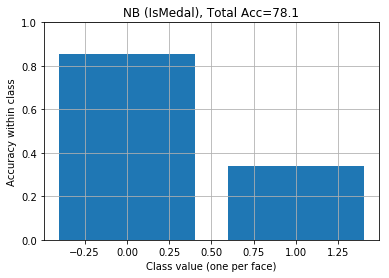

In [72]:
from sklearn.naive_bayes import GaussianNB
yhat = np.zeros(y1.shape) # create a placeholder for predictions
clf = GaussianNB() # creqate a Naive Bayes classifier which uses a probabilistic framework for predictions

# iterate through and get predictions, saved to the correct row in yhat
# decided to use the Stratified Shuffle Split CV object to allow for a 80-20 training-testing split (and faster than Kfold)
for train,test in cv_object.split(X1,y1):
    clf.fit(X1[train],y1[train])
    yhat[test] = clf.predict(X1[test])
    
    acc = mt.accuracy_score(y1,yhat)
    conf = mt.confusion_matrix(y1,yhat)
    f1 = f1_score(y1, yhat, pos_label=1, average='binary') # calculate the weighted average between precision and recall
    print("NB F1 Score:",f1)
    print('NB accuracy:',acc)
    print("NB confusion matrix:\n",conf)

def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per face)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()

plot_class_acc(y1,yhat,title='NB (IsMedal)')

In using the Naive Bayes (NB) classifier to predict whether the athlete in an olympics game is a medalist or not, we have 2 classes for IsMedal (either 1 or 0) and 27 features per instance. NB classifier calculates a posterior probability for each class and each posterior probability is a multiplication of all conditional probabilities.

We will have 54 (2 * 27) conditional probabilities and 2 prior probabilities for each class. Using the prior probability of receiving a medal at ~15% (39,783 / 271,116) and not receiving a medal at ~85%, we construct the NB probability framework and compute the posterior probability by taking the product of each attribute's likelihoood. 

NB is robust to isolated noise points, ignores missing values in probability calculations, and is robust to irrelevant attributes. Also, since NB calculates probabilities, it is less computationally complex and can perform a relatively quick calculation.

Performing a NB classification results in an average accuracy of about 80% which is further depicted by the diagram above. The model predicts a non-medalists at ~95% accuracy, while the accuracy of predicting a medalist winner is estimated at less than 20%.

The model also has an average F1 Score of about 0.3, which is not great. It does not do well at predicting the minority class!

#### Naive Bayes Task Two: target variable IsMale

NB F1 Score: 0.43558475092146015
NB accuracy: 0.3775726995086974
NB confusion matrix:
 [[ 65116   9406]
 [159344  37250]]
NB F1 Score: 0.43885967467459797
NB accuracy: 0.4599876067808613
NB confusion matrix:
 [[ 57251  17271]
 [129135  67459]]
NB F1 Score: 0.44313572542901714
NB accuracy: 0.5260257601912096
NB confusion matrix:
 [[ 51129  23393]
 [105109  91485]]
NB F1 Score: 0.4461549647366763
NB accuracy: 0.5785530916655601
NB confusion matrix:
 [[ 46022  28500]
 [ 85761 110833]]
NB F1 Score: 0.45108225108225103
NB accuracy: 0.6211658478289735
NB confusion matrix:
 [[ 42201  32321]
 [ 70387 126207]]
NB F1 Score: 0.45335467738543156
NB accuracy: 0.6548857315687749
NB confusion matrix:
 [[ 38799  35723]
 [ 57843 138751]]
NB F1 Score: 0.4565418298640145
NB accuracy: 0.6811586184511427
NB confusion matrix:
 [[ 36309  38213]
 [ 48230 148364]]
NB F1 Score: 0.4575425112366722
NB accuracy: 0.702190206406114
NB confusion matrix:
 [[ 34051  40471]
 [ 40270 156324]]
NB F1 Score: 0.4597163805842

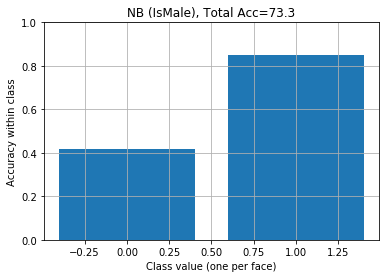

In [73]:
yhat = np.zeros(y2.shape) # create a placeholder for predictions
clf = GaussianNB() # creqate a Naive Bayes classifier which uses a probabilistic framework for predictions

# iterate through and get predictions, saved to the correct row in yhat
# decided to use the Stratified Shuffle Split CV object to allow for a 80-20 training-testing split (and faster than Kfold)
for train,test in cv_object.split(X2,y2):
    clf.fit(X2[train],y2[train])
    yhat[test] = clf.predict(X2[test])

    acc = mt.accuracy_score(y2,yhat) 
    conf = mt.confusion_matrix(y2,yhat)
    f1 = f1_score(y2, yhat, pos_label=0, average='binary') # calculate the weighted average between precision and recall
    print("NB F1 Score:",f1)
    print('NB accuracy:',acc)
    print("NB confusion matrix:\n",conf)

plot_class_acc(y2,yhat,title='NB (IsMale)')

Similarily, applying the NB classifier to predict the athelete's gender, we have 2 classes for IsMale (either 1 or 0) and the same 27 features per instance. Once again, we will have 54 (2 * 27) conditional probabilities and 2 prior probabilities for each class. Our prior probability for a male athlete in the olympics is ~72% (196,116 / 271,116) while 28% for female. 

The accuracy of a NB classifier in this instance is lower and has a very high variability raning from 40%-73%. The Naive Bayes model seems to have high variability in performance based on the split of data that it receives. This is not a good model. You want a model that generalizes well to the data! 

Additionally, the F1 Score for IsMale is on average about 0.5. This is not bad, but there is still room for improvement. 

As shown in the diagram, predicting a classification for male athlete is estimated at 99%, however, classification of a female counterpart is approximated at 5-8%. 

## Modeling and Evaluation 4

### Analyze and Visualize the Results of Chosen Models

In [75]:
# initialize lists of lists 
performance_IsMedal = [['Naive Bayes', '80%','0.3'], ['Random Forest', '75%', '0.36'], ['SVM with SGD', '85%','0.01']] 
performance_IsMale = [['Naive Bayes', '56%','0.5'], ['Random Forest', '89%', '0.80'], ['SVM with SGD', '85%','0.71']]   

# Create the pandas DataFrames 
performance_IsMedal_df = pd.DataFrame(performance_IsMedal, columns = ['Model', 'Avg Accuracy', 'Avg F1 Score']) 
performance_IsMale_df = pd.DataFrame(performance_IsMale, columns = ['Model', 'Avg Accuracy', 'Avg F1 Score'])   

# print dataframes 
print('Model Metrics for the final models for classification task 1: IsMedal:')
print(performance_IsMedal_df)
print('Model Metrics for the final models for classification task 2: IsMale:')
print(performance_IsMale_df)

Model Metrics for the final models for classification task 1: IsMedal:
           Model Avg Accuracy Avg F1 Score
0    Naive Bayes          80%          0.3
1  Random Forest          75%         0.36
2   SVM with SGD          85%         0.01
Model Metrics for the final models for classification task 2: IsMale:
           Model Avg Accuracy Avg F1 Score
0    Naive Bayes          56%          0.5
1  Random Forest          89%         0.80
2   SVM with SGD          85%         0.71


Looking at the above table, Naive Bayes overall is the worst performing model for both classification tasks.

SVM with SGD is a good model for the IsMale task because it has a high average accuracy and a high average F1 Score for the IsMale task.
However, it does not do well at all with the IsMedal task. It has an F1 Score of 0.01! It does very poorly at correctly predicting the minority class in IsMedal.

The Random Forest model is the best performer in both tasks, but it also struggles a little with the average F1 Score in the IsMedal task. It has an average F1 score of 0.36 for IsMedal, only slightly higher than Naive Bayes.

As we suspected, some models perform better than others.. and the performance depends on many things, especially on the data set and classification problem.

However, if we were to choose one winner for both tasks, it would be the Random Forest model because it consistently acheives the highest F1 Score.

In [105]:
def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)
def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per face)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()

In [107]:
from sklearn.model_selection import StratifiedShuffleSplit

# Set up CV object2    
num_cv_iterations = 1
cv_object2 = StratifiedShuffleSplit(n_splits=num_cv_iterations, test_size=0.2, random_state=0)
print(cv_object2)

StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.2,
            train_size=None)


In [108]:
# Parameters: n_estimators=100, criterion="gini", max_depth=5, random_state=0, class_weight="balanced"

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

RFC=RandomForestClassifier(n_estimators=50, criterion="gini", max_depth=5, random_state=0, class_weight="balanced")
scaler = StandardScaler()

for train_indices, test_indices in cv_object2.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we may want to interpret feature importance later so they should be on the same scale
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    X1_test = scaler.transform(X1_test)
    
    # train the reusable model on the training data
    RFC.fit(X1_train,y1_train) # train object
    y1_hat = RFC.predict(X1_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y1_test,y1_hat)
    conf = mt.confusion_matrix(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)

F1 Score
 0.36485842310992467
accuracy 0.7542785482443198
confusion matrix
 [[37073  9194]
 [ 4130  3827]]


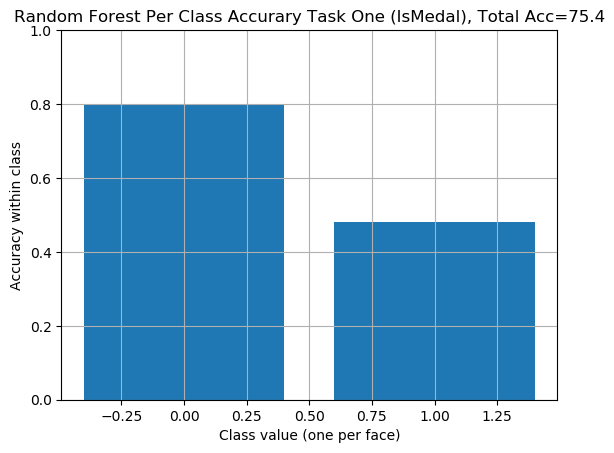

In [109]:
plot_class_acc(y1_test,y1_hat,title="Random Forest Per Class Accurary Task One (IsMedal)")

How good is the Random Forest at classifiying the different classes? This graphic does a great job at showing just how much the model struggles classifying the minority class (medal). This is an interesting graphic for someone using this model because they could use it to decide which metric to use to evaluate the model, such as precision or sensitivity. They may be more concerned about correctly identifying the minority class, as we are, instead of the majority class.

In [112]:
# Parameters: n_estimators=100, criterion="gini", max_depth=5, random_state=0, class_weight="balanced"

# create X1 and y1 from the data
if 'IsMale' in df_male:
    y1 = df_male['IsMale'].values # get the labels we want  
    X1 = df_male.loc[:, df_male.columns != 'IsMale'].values # use everything else to predict!

RFC=RandomForestClassifier(n_estimators=30, criterion="gini", max_depth=50, random_state=0, class_weight="balanced")
scaler = StandardScaler()

for train_indices, test_indices in cv_object2.split(X1,y1): 

    X1_train = X1[train_indices]
    y1_train = y1[train_indices]
    
    X1_test = X1[test_indices]
    y1_test = y1[test_indices]
    
    # do not technically need to scale data because random forest is not a distance based model
    # however, we may want to interpret feature importance later so they should be on the same scale
    scaler.fit(X1_train)
    X1_train = scaler.transform(X1_train)
    X1_test = scaler.transform(X1_test)
    
    # train the reusable model on the training data
    RFC.fit(X1_train,y1_train) # train object
    y1_hat = RFC.predict(X1_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y1_test,y1_hat)
    conf = mt.confusion_matrix(y1_test,y1_hat)
    f1 = f1_score(y1_test, y1_hat, pos_label=1, average='binary')
    print("F1 Score\n",f1)
    print("accuracy", acc )
    print("confusion matrix\n",conf)

F1 Score
 0.9256284871621364
accuracy 0.8925752434346415
confusion matrix
 [[12150  2755]
 [ 3070 36249]]


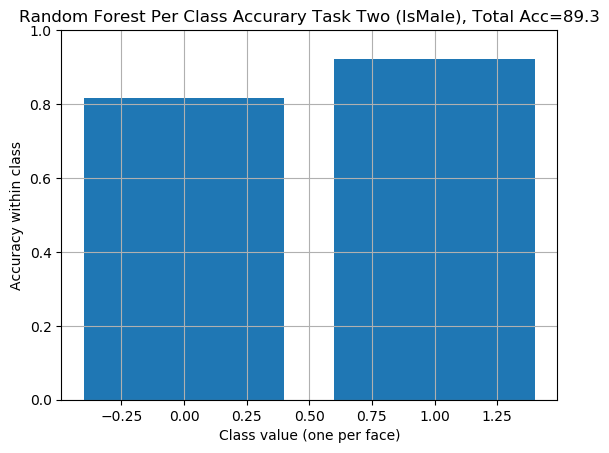

In [113]:
plot_class_acc(y1_test,y1_hat,title="Random Forest Per Class Accurary Task Two (IsMale)")

This graphic shows that although the IsMale class imbalance is high, the model is able to classify the two classes better than it was able to classify the two classes in IsMedal. This graphic is interesting for someone using the model because it gives an idea at how easy it is to predict one class over another. Just because a data set is imbalanced does not mean it is necessarily hard to predict one class over another, so you must visualize graphs like these to better understand your model.

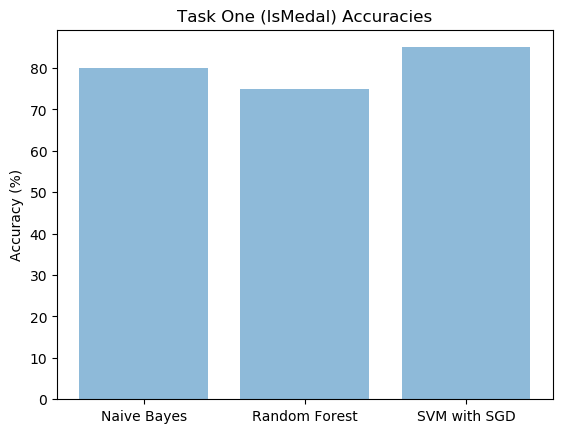

In [100]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ['Naive Bayes', 'Random Forest', 'SVM with SGD']
y_pos = np.arange(len(objects))
performance = [80,75,85]

plt.bar(y_pos,performance,align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy (%)')
plt.title('Task One (IsMedal) Accuracies')
 
plt.show()

SVM has the highest accuracy for the IsMedal task. Random Forest has the lowest accuracy! It is always good to compare accuracies across models, it is often thought of as the baseline model metric.

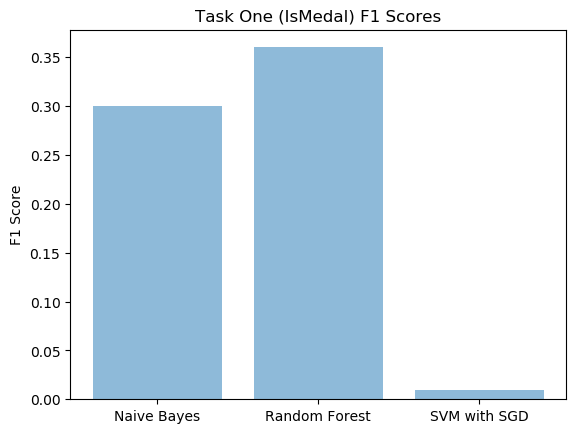

In [104]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ['Naive Bayes', 'Random Forest', 'SVM with SGD']
y_pos = np.arange(len(objects))
performance = [0.3,0.36,0.01]

plt.bar(y_pos,performance,align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('F1 Score')
plt.title('Task One (IsMedal) F1 Scores')
 
plt.show()

It turns out that the SVM with SGD high accuracy score is misleading: it has a really low F1 Score. Random Forest has the highest F1 Score. It is especially interesting to compare the F1 Scores and the Accuracies with visualizations like this, because you can see how a high accuracy does not guarantee a good model, especially with imbalanced data sets. Evaluating models is all about choosing the right metric for the task, and in this case we can see how some metrics appear better than they are! Accuracy can tell a false story. Someone using this model should compute multiple metrics and compare and visualize the results like with these graphs.

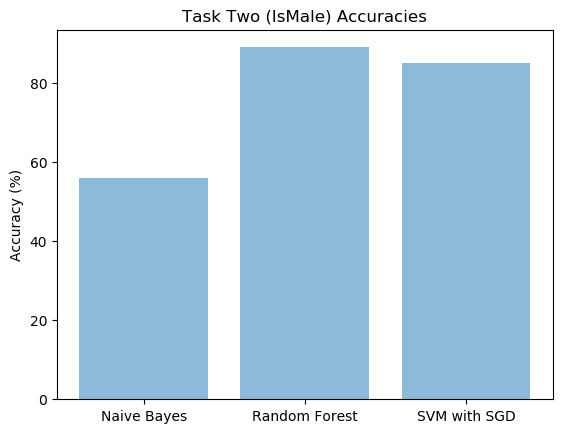

In [102]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ['Naive Bayes', 'Random Forest', 'SVM with SGD']
y_pos = np.arange(len(objects))
performance = [56,89,85]

plt.bar(y_pos,performance,align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy (%)')
plt.title('Task Two (IsMale) Accuracies')
 
plt.show()

Once again, comparing accuracies across models. Naive Bayes really struggles with the IsMale data set.

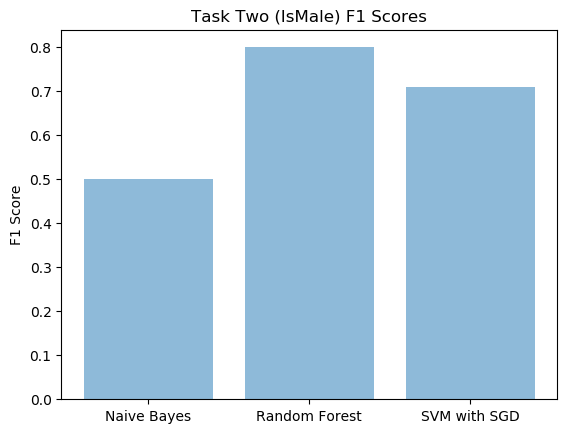

In [103]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ['Naive Bayes', 'Random Forest', 'SVM with SGD']
y_pos = np.arange(len(objects))
performance = [0.5,0.8,0.71]

plt.bar(y_pos,performance,align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('F1 Score')
plt.title('Task Two (IsMale) F1 Scores')
 
plt.show()

Random Forest has the highest F1 Score and the higest accuracy for the IsMale task. It is the clear winner! It is important to look at multiple model metrics and weigh their importances in relation to you specific problem, but in this case, these graphs show a clear model winner.

## Modeling and Evaluation 5

### Model Advantages/Disadvantages and Statistical Analysis

Summary of Model Advantages and Disadvantages:
Note: because both tasks were very similar imbalanced classification tasks, the model advantages and disadvantages apply to both tasks!

                                        Random Forest
Advantages: 
- can achieve a model with high accuracy and high F1 Score
- performs well on imbalanced data sets like ours: it does well with predicting the minority class
- many parameters available to set for the model, and taking the time to understand and tune the different parameters can help you achieve even better model performance!
- the model is easily interpretable/understandable by visualizing the individual trees of the model
- overall a highly flexible model
Disadvantages:
- due to the many parameters combinations, it can take a long time to fine tune this model
- if you are using many trees in the model, such as 500 or 1000 the model run time with ten-fold cross validation is very long!

                                        Naive Bayes
Advantages: 
- the model takes no parameters, so it is extremely easy and fast to code and implement
- runs relatively quickly
Disadvantages:
- because the model takes no parameters, there is no way to improve the model performance
- an inflexible model
- does not seem to perform well on imbalanced data sets
- must assume observations are independent to run model, even if they aren't (the Naive part of Naive Bayes)

                                        SVM with SGD
Advantages: 
- the model takes multiple parameters, so you can improve the model performance by tuning the parameters
- runs very quickly!
- flexible model
- performs relatively well on imbalanced data sets
- uses support vector machines, which is a big deal in ML and enables for interesting visualizations 
Disadvantages:
- due to the many parameters combinations, it can take a long time to fine tune this model
- not true SVM because true SVM takes a long time to run, so this uses the Stochastic Gradient Descent Optimizer, which can lead to decreased model performance


To statistically compare our final models and their final chosen parameters for each classification task, we will use a T-test. We will use the T-Test to compare the mean accuracies of the models, with the null hypothesis being that the populations have the same distribution. One cause for concern is that the Student's T-test assumes independence of oberservations. However, researches still use the T-test with ten-fold cross validation (a form of naive T-test) with the acknowledgement that there may be a higher type 1 error. We do the same thing when we use Naive Bayes: we use the algorithm even if the data is not independent with this acknowledgement. 

We will use the T-test and ten-fold cross validation and proceed with caution. If we observe a p-value less than our alpha of 0.05 then we can confidently reject the null hypothesis of equal average accuracies between models with a 95% confidence (95% confidence because our cutoff alpha is 0.05).
In other words, if the p-value is less than 0.05, we can say that with 95% confidence there is a statistically significant difference between the mean accuracies of the models.  

##### Statistical Comparison of models for classification task one: IsMedal

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

# Set up CV object   
# set the seed 
num_cv_iterations = 10
cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations, test_size=0.2, random_state=0)
scaler = StandardScaler()

regularize_const = 0.001
iterations = 4
model_1 = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l1',random_state=0)
model_2 = RandomForestClassifier(n_estimators=50, criterion="gini", max_depth=5, random_state=0, class_weight="balanced")

cv_mae_1 = []
cv_mae_2 = []

for train_index, val_index in cv_object.split(X1,y1):
    scaler.fit(X1[train_index])
    X1[train_index]= scaler.transform(X1[train_index])
    X1[val_index] = scaler.transform(X1[val_index])
    
    model_1.fit(X1[train_index], y1[train_index])
    pred_1 = model_1.predict(X1[val_index])
    acc_1 = mt.accuracy_score(y1[val_index],pred_1)
    cv_mae_1.append(acc_1)

    model_2.fit(X1[train_index], y1[train_index])
    pred_2 = model_2.predict(X1[val_index])
    acc_2 = mt.accuracy_score(y1[val_index],pred_2)
    cv_mae_2.append(acc_2)

In [83]:
from scipy import stats
stats.ttest_rel(cv_mae_1,cv_mae_2)

Ttest_relResult(statistic=43.40265631443224, pvalue=9.13599394463683e-12)

The p-value = 9.13*10^-12 of this model comparison is much less than the alpha=0.05. We can say with 95% confidence that there is a statistically significant difference between the mean accuracies of the SVM with SGD model and the Random Forest model for classification task one: IsMedal.

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

# Set up CV object   
# set the seed 
num_cv_iterations = 10
cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations, test_size=0.2, random_state=0)
scaler = StandardScaler()

regularize_const = 0.001
iterations = 4
model_1 = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=0.0, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l1',random_state=0)
model_2 = GaussianNB()

cv_mae_1 = []
cv_mae_2 = []

for train_index, val_index in cv_object.split(X1,y1):
    scaler.fit(X1[train_index])
    X1[train_index]= scaler.transform(X1[train_index])
    X1[val_index] = scaler.transform(X1[val_index])
    
    model_1.fit(X1[train_index], y1[train_index])
    pred_1 = model_1.predict(X1[val_index])
    acc_1 = mt.accuracy_score(y1[val_index],pred_1)
    cv_mae_1.append(acc_1)

    model_2.fit(X1[train_index], y1[train_index])
    pred_2 = model_2.predict(X1[val_index])
    acc_2 = mt.accuracy_score(y1[val_index],pred_2)
    cv_mae_2.append(acc_2)

In [85]:
from scipy import stats
stats.ttest_rel(cv_mae_1,cv_mae_2)

Ttest_relResult(statistic=96.12058519466778, pvalue=7.240913142552636e-15)

The p-value = 7.2*10-15 of this model comparison is much less than the alpha=0.05. We can say with 95% confidence that there is a statistically significant difference between the mean accuracies of the SVM with SGD model and the Naives Bayes model for classification task one: IsMedal.

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!

# Set up CV object   
# set the seed 
num_cv_iterations = 10
cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations, test_size=0.2, random_state=0)
scaler = StandardScaler()

regularize_const = 0.2
iterations = 4
model_1 = GaussianNB()
model_2 = RandomForestClassifier(n_estimators=50, criterion="gini", max_depth=5, random_state=0, class_weight="balanced")

cv_mae_1 = []
cv_mae_2 = []

for train_index, val_index in cv_object.split(X1,y1):
    scaler.fit(X1[train_index])
    X1[train_index]= scaler.transform(X1[train_index])
    X1[val_index] = scaler.transform(X1[val_index])
    
    model_1.fit(X1[train_index], y1[train_index])
    pred_1 = model_1.predict(X1[val_index])
    acc_1 = mt.accuracy_score(y1[val_index],pred_1)
    cv_mae_1.append(acc_1)

    model_2.fit(X1[train_index], y1[train_index])
    pred_2 = model_2.predict(X1[val_index])
    acc_2 = mt.accuracy_score(y1[val_index],pred_2)
    cv_mae_2.append(acc_2)

In [87]:
from scipy import stats
stats.ttest_rel(cv_mae_1,cv_mae_2)

Ttest_relResult(statistic=28.18325285762065, pvalue=4.33442444183628e-10)

The p-value = 4.3*10^-10 of this model comparison is much less than the alpha=0.05. We can say with 95% confidence that there is a statistically significant difference between the mean accuracies of the Random Forest model and the Naives Bayes model for classification task one: IsMedal.

After comparing the three models we can say with 95% confidence that there is a statistically significant difference in the mean accuracies of the models for the classification task one: IsMedal. 
Random Forest performs the best out of the three models with an average accuracy of about 75%. Although we did not statistically compare the F1 Scores of the three models, Random Forest also consistently had a higher F1 Score (see the table in the above section). Because of the statistically significant difference in the mean accuracies of the models with 95% confidence and the higher F1 Score of Random Forest, Random Forest is the best performing model for classification task 1: IsMedal.

##### Statistical Comparison of models for classification task two: IsMale

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit

# create X1 and y1 from the data
if 'IsMale' in df_male:
    y1 = df_male['IsMale'].values # get the labels we want  
    X1 = df_male.loc[:, df_male.columns != 'IsMale'].values # use everything else to predict!

# Set up CV object   
# set the seed 
num_cv_iterations = 10
cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations, test_size=0.2, random_state=0)
scaler = StandardScaler()

regularize_const=0.0001
iterations = 4
model_1 = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=1, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l2')
model_2 = RandomForestClassifier(n_estimators=30, criterion="gini", max_depth=50, random_state=0, class_weight="balanced")

cv_mae_1 = []
cv_mae_2 = []

for train_index, val_index in cv_object.split(X1,y1):
    scaler.fit(X1[train_index])
    X1[train_index]= scaler.transform(X1[train_index])
    X1[val_index] = scaler.transform(X1[val_index])
    
    model_1.fit(X1[train_index], y1[train_index])
    pred_1 = model_1.predict(X1[val_index])
    acc_1 = mt.accuracy_score(y1[val_index],pred_1)
    cv_mae_1.append(acc_1)

    model_2.fit(X1[train_index], y1[train_index])
    pred_2 = model_2.predict(X1[val_index])
    acc_2 = mt.accuracy_score(y1[val_index],pred_2)
    cv_mae_2.append(acc_2)

In [89]:
from scipy import stats
stats.ttest_rel(cv_mae_1,cv_mae_2)

Ttest_relResult(statistic=-40.10433518152566, pvalue=1.8545326681755226e-11)

The p-value = 1.8*10^-11 of this model comparison is much less than the alpha=0.05. We can say with 95% confidence that there is a statistically significant difference between the mean accuracies of the SVM with SGD model and the Random Forest model for classification task two: IsMale.

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit

# create X1 and y1 from the data
if 'IsMale' in df_male:
    y1 = df_male['IsMale'].values # get the labels we want  
    X1 = df_male.loc[:, df_male.columns != 'IsMale'].values # use everything else to predict!   

# Set up CV object
# set the seed 
num_cv_iterations = 10
cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations, test_size=0.2, random_state=0)
scaler = StandardScaler()

regularize_const=0.0001
iterations = 4
model_1 = SGDClassifier(alpha=regularize_const,
        fit_intercept=True, l1_ratio=1, learning_rate='optimal',
        loss='hinge', max_iter=iterations, n_jobs=-1, penalty='l2')
model_2 = GaussianNB()

cv_mae_1 = []
cv_mae_2 = []

for train_index, val_index in cv_object.split(X1,y1):
    scaler.fit(X1[train_index])
    X1[train_index]= scaler.transform(X1[train_index])
    X1[val_index] = scaler.transform(X1[val_index])
    
    model_1.fit(X1[train_index], y1[train_index])
    pred_1 = model_1.predict(X1[val_index])
    acc_1 = mt.accuracy_score(y1[val_index],pred_1)
    cv_mae_1.append(acc_1)

    model_2.fit(X1[train_index], y1[train_index])
    pred_2 = model_2.predict(X1[val_index])
    acc_2 = mt.accuracy_score(y1[val_index],pred_2)
    cv_mae_2.append(acc_2)

In [91]:
from scipy import stats
stats.ttest_rel(cv_mae_1,cv_mae_2)

Ttest_relResult(statistic=140.8288005933854, pvalue=2.3326063212536843e-16)

The p-value = 2.3*10^-16 of this model comparison is much less than the alpha=0.05. We can say with 95% confidence that there is a statistically significant difference between the mean accuracies of the SVM with SGD model and the Naives Bayes model for classification task two: IsMale.

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedShuffleSplit

# create X1 and y1 from the data
if 'IsMedal' in df_medal:
    y1 = df_medal['IsMedal'].values # get the labels we want  
    X1 = df_medal.loc[:, df_medal.columns != 'IsMedal'].values # use everything else to predict!from sklearn.model_selection import StratifiedShuffleSplit

# Set up CV object   
# set the seed 
num_cv_iterations = 10
cv_object = StratifiedShuffleSplit(n_splits=num_cv_iterations, test_size=0.2, random_state=0)
scaler = StandardScaler()

regularize_const = 0.2
iterations = 4
model_1 = GaussianNB()
model_2 = RandomForestClassifier(n_estimators=30, criterion="gini", max_depth=50, random_state=0, class_weight="balanced")

cv_mae_1 = []
cv_mae_2 = []

for train_index, val_index in cv_object.split(X1,y1):
    scaler.fit(X1[train_index])
    X1[train_index]= scaler.transform(X1[train_index])
    X1[val_index] = scaler.transform(X1[val_index])
    
    model_1.fit(X1[train_index], y1[train_index])
    pred_1 = model_1.predict(X1[val_index])
    acc_1 = mt.accuracy_score(y1[val_index],pred_1)
    cv_mae_1.append(acc_1)

    model_2.fit(X1[train_index], y1[train_index])
    pred_2 = model_2.predict(X1[val_index])
    acc_2 = mt.accuracy_score(y1[val_index],pred_2)
    cv_mae_2.append(acc_2)

In [99]:
from scipy import stats
stats.ttest_rel(cv_mae_1,cv_mae_2)

Ttest_relResult(statistic=-10.011369741378422, pvalue=3.544549909829185e-06)

The p-value of this model comparison is much less than the alpha=0.05. We can say with 95% confidence that there is a statistically significant difference between the mean accuracies of the Random Forest model and the Naives Bayes model for classification task two: IsMale.

After comparing the three models we can say with 95% confidence that there is a statistically significant difference in the mean accuracies of the models for the classification task two: IsMale. 
Random Forest performs the best out of the three models with an average accuracy of about 89%. Although we did not statistically compare the F1 Scores of the three models, Random Forest also consistently had a higher F1 Score (see the table in the above section). Because of the statistically significant difference in the mean accuracies of the models with 95% confidence and the higher F1 Score of Random Forest, Random Forest is the best performing model for classification task two: IsMale.

## Modeling and Evaluation 6

### Attribute Importance

In the first section of this workbook (Data Preparation 1), the team utilized RFE with the random forest model in order to reduce features.  As had been discussed in prior submissions and was apparanent with this data set, is the sheer number of features (300+) when converting a handful of categorization variables with multiple classes (in some case over 100+) into binary integers (one-hot int).  This was obviously necessary in order to produce a model that is actually usable; something that can be interpreted by humans, but also deployed (for predictive purposes) by humans.  

A RFE with the random forest model was deployed for each task - one task to predict a medal winner and the second task to predict whether the athlete was male or female.  RFE (or recursive feature elimination) is based around the idea of running a model and observing the best performing feature (based on defined importance) and then setting aside that feature.  The model is then re-ran and the process repeated until each feature has effectively been eliminated.  The features are then ranked according to when they were removed from the process.  

In using the random forest model (to determine feature importance for selection purposes), we are able to greatly reduce the number of model iterations.  That is, a great number of features would be removed (or reduced to importance = 0) simultaneously (after important features have been exhausted) due to the nodal nature of the random forest model.  The team observed this in action as evidenced by the 'minilab' submission where the RFE was conducted using a logistic regression model.  In using this model, the team had to specify a 'cut-off' of selected features (in our case, that was 30) otherwise the process was just force ranking features (and not necessarily eliminating automatically).  

This was the benefit of using the random forest model for the RFE:  the team was able to eliminate numerous, 'unimportant' features for purposes of building interpretable models for each task without having to resort to judgemet on an arbritary number of features for selection.  Specifically, for the 'IsMedal' task the final feature set was 27, and for the 'IsMale' task the final feature set is 21.  The reduction in features for each task was therefore significant and meaningful.

A bar chart with each of the selected features (using the RFE) is provided below for each task and denoted by the header.

Additional discussion around the selected attributes (and their relative imporance) follows each chart.

### Variable (feature) importance for 'IsMedal' Dataset

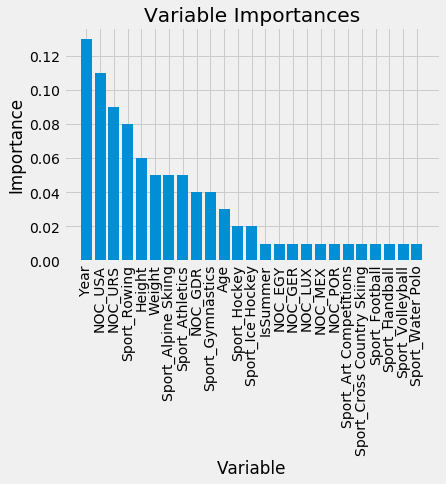

The above graph illustrates the RFE selected features for the 'IsMedal' task stacked left to right from most important (or influential) to least.  What can be seen is that coming from the US or USSR is quite important when determining the likelihood of a person medaling followed by:

- Year
- Weight
- Height
- Gymnastics
- Rowing
- East Germany
- Alpine Skiing
- Athletics
- Hockey
- Age
- Handball
- Ice Hockey
- Summer Games
- Egypt
- Germany
- Luxembourg
- Mexico
- Portugal
- Russia
- Art Competitions
- Basketball
- Cross Country Skiing
- Football
- Volleyball
- Water Polo

After the feature of year, we see the level of importance drop from approx. 0.1 to 0.06 where for the next 11 features it periodically decreases until dropping to approximately 0.01 for the remaining features.  Thus, it really does appear, out of all the features selected, that the first three are the most meaningful and, coincidentally, also carry a large number of observations in the population.  This of course is very helpful for model usefulness.  

An interesting view of the features is that there seems to be mix between countries, sports, and specific attributes to the athlete (such as age, height, and weight).  Having these later features (athlete specific attributes) was extraordinarily useful as well because it will enable some prediction capabilities for when a particular athlete does not come from a country or play a sport represented in the selected features.  

The represenation of countries clearly points towards global economic and cultural powers over the past century.  This could always be further explored in future analyses (e.g., is sport success a bi-product of wealth and power?).  The representation of sports in the features is interesting because the sports seem to vacillate between the very common and popular (i.e., football or athletics) and the more obscure (i.e., art competitions).   

### Variable (feature) importance for 'IsMale' Dataset

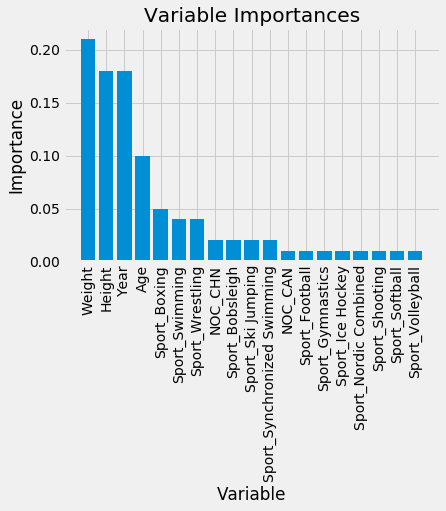

The above graph illustrates the RFE selected features for the 'IsMale' task stacked left to right from most important (or influential) to least.  What can be seen is that once an athlete's weight, height, year of competition, and age is determined, the remaining selected features are sports (with one exception) in the following order:

- Boxing
- Swimming
- Wrestling
- China
- Cycling
- Ski Jumping
- Art Competitions
- Bobsleigh
- Football
- Gymnastics
- Ice Hockey
- Nordic Combined
- Rhythmic Gymnastics
- Shooting
- Softball
- Synchronized Swimming
- Weightlifting

There is a clear drop off in importance after height and weight.  This is interesting in that it basically indicates a strong ability to predict just based on body mass index!  And that prediction capability is even greater when accounting for year of competition and the age of athlete!  After those features, all remaining features are below 0.05.  

However, about those remaining features (setting aside China), it is interesting to observe that many of the sports seem to fall under the category of male predominant (or vice versa for females) - if not in the current period than certainly historically.  For example, women have not always been represented in boxing, weightlifing, or wrestling.  The same goes for men in sports such as synchronized swimming or rhythmic gymnastics.  This stands within reason.  If we are trying to predict whether an athlete is male or female, and we can see that an athlete competed in boxing during a much earlier period, then we can probably be successful in predicting the athlete to be a male.

The inclusion of China as a selected feature is quite interesting (and unexpected).  This is likely due to the high rate of female participation from the Chinese team especially when you are able to account for an athlete's height and weight.

## Deployment

This model was created with the understanding that it would need to be updated with every Olympic games.  As the games carry on, each new event represents a significant new tranche of data as well as the overall evolution of states, sports, and distribution of individual athlete metrics.  It would also be useful to collect additional data in conjunction with the data utilized in this model including information such as state population and wealth or individual athlete metrics (e.g., the deadlift amounts for athletes). We firmly believe that with additional data comes additional insights and ability to predict (especially for variables that could be continuous in nature).

In a very basic sense, if we wanted to measure the usefulness of the model, we would make a prediction (or it would make a prediciton) and then we would get to see if it came true or not.  In the case of 'IsMale' this would be relatively quick (we do not have to wait for the next Olympic event).

The model would best be deployed in a simple user interface enabling a handful of data fields to be entered (such as height, weight, country, etc.) and from there the prediction could be made with production code (using the feature importance rates in the background).

The question of whether the model would be useful to the interested parties of course carries with it the question of who are the interested parties.  If the interested party was not particular to a country or sport represented in any of the selected feature, then the answer is perhaps 'less so'.  However, if the customer was the IOC then the answer is yes in that the model definitely accounts for the entire population (albeit with the selected features there is just a greater enablement of interpreting according to key countries and sports).

## Exceptional Work

We would like to be considered for exceptional work for using ensemble methods in all of our classifiers.
We do an RFE using a random forest model and then use the resulting, final data sets on another random forest model (different parameters), and SVM with SGD model, and a Naive Bayes model. Using one model as an RFE and then another model on the resulting data is a form of ensemble classifiers.

We also did a lot of paremeter tuning and explaining the significance of differnt parameter change and what that means in terms of model performance overall.

We also used cool graphs in our RFE, if you would like to give us exceptional points for that.
We also provided additional graphs in our model outputs and provided a table that compare all the model performances side by side.
